<a href="https://colab.research.google.com/github/GourabR/Playstore_app_review_analysis/blob/main/EDA_playstore_app_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - Playstore App Review Analysis

**Project Type** - EDA

**Contribution** - Individual

## Business Problem Overview


 The data from the Google Play Store apps holds immense potential in driving the success of app-making businesses. By analyzing this data, developers can extract actionable insights that can help them capture the Android market effectively.

Android enjoys widespread adoption across the globe, with over 74% of the world market using this mobile operating system. This makes it highly lucrative for app developers to create and develop apps specifically for Android.

Investing in app development becomes even more worthwhile when you anticipate that your apps will gain significant traction in the future. To ensure that apps are tailored to the needs and preferences of users, analyzing the data from Google Play Store apps becomes invaluable.

Through this analysis, developers can gain a deep understanding of the key factors that contribute to app engagement and success. This knowledge allows them to design apps that align with what users truly desire, enhancing their chances of widespread acceptance and usage.

Moreover, investors can leverage this data analysis to make informed decisions regarding their investments in the app market. By identifying the trends and preferences of Android users, they can allocate their resources wisely and choose the most promising app development projects.

In summary, the analysis of data from the Google Play Store apps provides a wealth of insights that can shape the success of app-making businesses. Whether it's creating user-centric apps or making strategic investment decisions, this data is a valuable asset in driving app engagement and capturing the Android market effectively.

We want to identify the app categories that have the highest average prices and explore their potential revenue generation. By understanding the pricing landscape, we can strategically allocate resources and optimize our offerings to maximize profitability. Additionally, we aim to analyze the correlation between app ratings and installs to uncover insights that will inform our user acquisition and retention strategies.

# Business Objective:

The objective is to optimize revenue generation in the mobile app store by identifying app categories with high average prices and leveraging their potential. Additionally, the objective is to understand the correlation between app ratings and installs to enhance user acquisition and retention strategies, ultimately driving growth and profitability.

## ***Let's Begin!***

In [1]:
# Importing importatnt libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading datasets
play_store_data = pd.read_csv('/content/playstore_data.csv')
user_review = pd.read_csv('/content/User Reviews.csv')

In [4]:
# Checking the top 10 rows of the dataframe.
play_store_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
# Checking the top 10 rows of the dataframe.
play_store_data.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
# Checking the shape of the dataset.
play_store_data.shape

(10841, 13)

In [7]:
# A brief information about the dataset
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
play_store_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# About the dataset:

Based on our inspection, the "play_store" dataframe contains 10,841 rows and 13 columns. Here is a breakdown of each column and the information it represents:


* **App:** This column contains the name of the application along with an optional short description.

* **Category:** It indicates the category to which the app belongs. Categories can include Games, Social, Education, Entertainment, etc.

* **Rating:** This column represents the average rating given by users for the respective app. Ratings are typically on a scale of 1 to 5.

* **Reviews:** It displays the total number of users who have provided reviews or feedback for the application.

* **Size:** This column specifies the amount of storage space occupied by the app on a mobile phone. It is usually measured in kilobytes (KB) or megabytes (MB).

* **Installs:** It indicates the total number of times the app has been installed or downloaded by users.

* **Type:** This column states whether the app is available for free or if it is a paid application. For free apps, the value is typically "Free," while for paid apps, it is "Paid."

* **Price:** If the app is a paid one, this column displays the price that needs to be paid to install it. For free apps, the price is usually zero.

* **Content Rating:** It specifies the age group for which the app is suitable. Common content ratings include Everyone, Teen, Mature, etc., indicating the recommended audience for the app.

* **Genres:** This column provides additional categories or genres to which the application can be classified. For example, within the Education category, there may be sub-genres such as Math, Language Learning, Science, etc.

* **Last Updated:** It indicates the date when the application was last updated in the Google Play Store.

* **Current Ver:** This column displays the current version number of the application. It represents the latest iteration or release of the app.

* **Android Ver:** It specifies the minimum version of the Android operating system required to run the application smoothly.


By analyzing the data within these columns, we can gain valuable insights into various aspects of the apps, such as their popularity, user ratings, pricing strategies, compatibility, and more.

# Problem Statements:

1.   Find out the app share in the Play Store category-wise to determine the distribution of apps across different categories.

2.   Identify the top 10 app categories that have garnered widespread usage.

3.   Find out the rating distribution among all the apps.

4.   Find out the price distribution of each category.

5.   Identify the most commonly accessed or frequently used content in the dataset.

6.   Find out the years in which most of the apps were last updated.

7.   Find out the top rated categories.

8.   Find out those categories which got maximum number of reviews.

9.   Find out the most installed categories.

10.  Find out the app categories in the Play Store that have the highest average prices.

11.  Find out the average rating of free and paid apps.

12.  Identify the type of apps that are mostly installed(paid or free).

13.  Find out which contents were mostly installed by users.

14.  Find the perentage of total number of paid and free apps in each category.

15.  Identify the category which has generated the maximum revenue.

16.  Identify the top 10 apps which belong to the maximum revenue generated category.

17.  Find out if there any correlation between the last updated year and installs.

18.  Find out if there any correlation between the last updated year and Ratings.

19.  Find out if there any correlation between the ratings and installs.

20.  Find out the average rating of each category in each type.(Identify the maximum as well as minimum rated category and it's type).

21.  Find out the percentage review sentiment across the dataset.

22.  Check if there any correlation between between sentiment polarity and rating.

23.  Find out the type of review sentiment received by each category.

24.  Find out the correlation among all numeric features.





# Cleaning the dataset.

# Handling Duplicates if present in the dataset.

In [9]:
# After exploring the data it is seen that the App column has Same values appearing multiple times.
(play_store_data['App'].duplicated().sum()/play_store_data.shape[0])*100

10.893828982566184

***Inference:***

More than 10% of the data is duplicated in this dataset. We need to get rid off those duplicate rows.

In [10]:
# Making a copy of a dataset which will be having only unique values in App column
df = play_store_data.loc[~play_store_data.duplicated('App')]

In [11]:
# Checking if the dataset still have any duplicate rows
df.duplicated().sum()

0

In [12]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Handling Outliers.

In [13]:
# Checking the statistics of the dataset in one go
df.describe()

,Rating
count,8197.000000
mean,4.175052
std,0.561026
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<Axes: ylabel='Rating'>

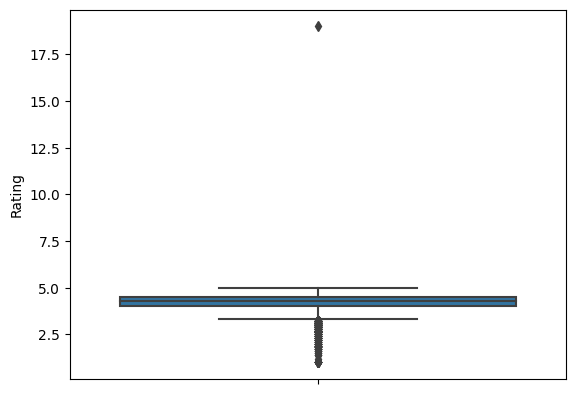

In [14]:
# It is seen that there is an outlier in Rating column.
sns.boxplot(data = df, y = 'Rating')

***Inference:***

A box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a dataset. It displays the five-number summary of the data, which includes the minimum, first quartile (25th percentile), median (50th percentile), third quartile (75th percentile), and maximum. The plot consists of a rectangular box that represents the interquartile range (IQR) and a vertical line (whisker) that extends from the box to the minimum and maximum values. It provides insights into the spread, central tendency, and presence of outliers in the data distribution.

With the help of this boxplot we can see that there is an outlier in our dataset.

*Let's find out.*

In [15]:
# Normally ratings are given out of 5. Here tried to check if there any value in Rating column which is > 5.
df[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
# Checking if there any value less than 1.
df[df['Rating'] < 1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


***Inference:***

As we all know the minimum ratings cannot go below 1. Here as we can see there is no value in Rating column which is less than 1.

Although we need to explore further.

*Let's continue.*

In [17]:
# Creating a variable which will hold the value of the index in which the outlier lies.
upper_limit = df[df['Rating'] == df['Rating'].max()].index

In [18]:
# The upper limit above which the values will be dropped. As there is only one outlier, that particular row will be dropped in which the it contains the value
df.drop(upper_limit, axis = 0, inplace = True)

In [19]:
# Checking the column again
df['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

<Axes: ylabel='Rating'>

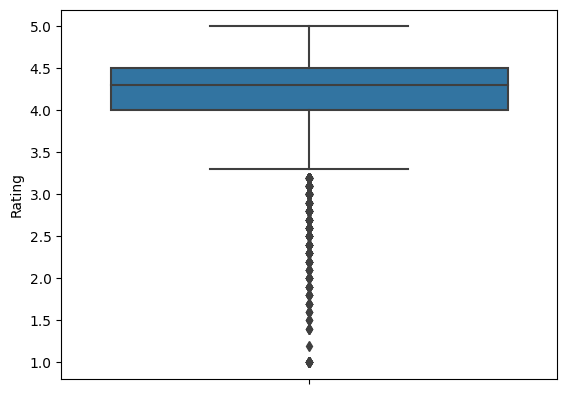

In [20]:
# Visualizing the 5 number summary with the help of a boxplot.
sns.boxplot(data = df, y = 'Rating')

***Inference:***

It is seen that the interquartile range here lies between 4 to 4.5. And the minimum and maximum is approximately 3.3 and 5 respectively. As we can see from the above boxplot that there are some rows in which the values are less than the minimum.

*Let's find out.*

In [21]:
# checking the data which lies below the lower limit. And it is seen that the values are accurate and valid.
df[df['Rating'] < 3.3]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
87,RST - Sale of cars on the PCT,AUTO_AND_VEHICLES,3.2,250,1.1M,"100,000+",Free,0,Everyone,Auto & Vehicles,"April 27, 2018",1.4,4.0.3 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23k,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up
311,comico Popular Original Cartoon Updated Everyd...,COMICS,3.2,93965,15M,"5,000,000+",Free,0,Teen,Comics,"July 3, 2018",6.3.0,4.0.3 and up
312,Daily Manga - Comic & Webtoon,COMICS,3.2,1446,7.1M,"100,000+",Free,0,Mature 17+,Comics,"May 18, 2018",1.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10630,Florida Blue,HEALTH_AND_FITNESS,3.2,499,34M,"100,000+",Free,0,Everyone,Health & Fitness,"July 10, 2018",4.2.1,7.0 and up
10665,SB · FN 1870 Mobile Banking,FINANCE,2.9,139,3.3M,"10,000+",Free,0,Everyone,Finance,"June 19, 2017",3.0.5,4.0 and up
10677,Pint - FN Theme,PERSONALIZATION,2.5,6,234k,100+,Free,0,Everyone,Personalization,"August 10, 2013",1.0,2.2 and up
10757,Fisher-Price® Smart Connect™,TOOLS,2.7,422,72M,"50,000+",Free,0,Everyone,Tools,"February 23, 2018",2.4.1,4.4 and up


***Inference:***

The values less than 3.3 seems to be accurate here. And we don't have to change anything.

# Handling Null values.

In [22]:
# Checking for null values in every column.
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [23]:
# Checking the percentage of null values in each column
(df.isnull().sum()/df.shape[0])*100

App                0.000000
Category           0.000000
Rating            15.146495
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.010353
Price              0.000000
Content Rating     0.000000
Genres             0.000000
Last Updated       0.000000
Current Ver        0.082824
Android Ver        0.020706
dtype: float64

***Inference:***

As we can see here int the "Rating" column more than 15% values are null which is excatly 1463, where as "Type", "Content Rating", "Current Ver" and "Android Ver" has 1,1,8,3 null values respectively. Either we shall fill those null values with the most appropriate value(mode), mean, or median or we will have to drop the rows depending on the situation.

In [24]:
# Checking the frequency count of the column rating
df['Rating'].value_counts()

4.3    897
4.4    895
4.5    848
4.2    810
4.6    683
4.1    621
4.0    513
4.7    442
3.9    359
3.8    286
5.0    271
3.7    224
4.8    221
3.6    167
3.5    156
3.4    126
3.3    100
4.9     85
3.0     81
3.1     69
3.2     63
2.9     45
2.8     40
2.6     24
2.7     23
2.5     20
2.3     20
2.4     19
1.0     16
2.2     14
2.0     12
1.9     11
1.7      8
1.8      8
2.1      8
1.6      4
1.4      3
1.5      3
1.2      1
Name: Rating, dtype: int64

In [25]:
# Creating three columns Rating1,Rating2,Rating3 which will contain values of the column Rating and the null values will be filled by mean.median and mode respectively.
df['Rating1'] = df['Rating'].fillna(df['Rating'].mean())
df['Rating2'] = df['Rating'].fillna(df['Rating'].median())
df['Rating3'] = df['Rating'].fillna(df['Rating'].mode()[0])

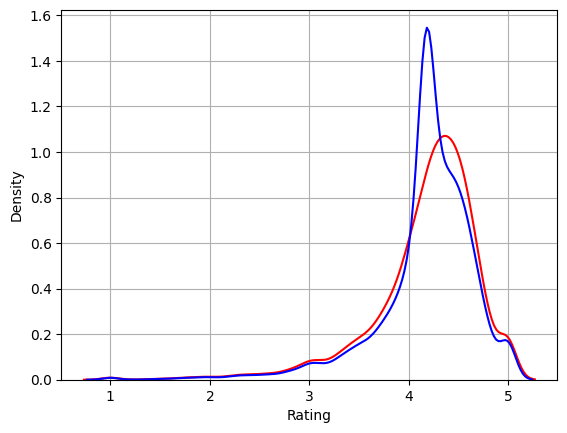

In [26]:
# Comparing and visualizing the column Rating1 with Rating whether it is correct to fill null values with mean or not.
sns.kdeplot(df['Rating'], color = 'red')
sns.kdeplot(df['Rating1'], color = 'blue')

plt.grid()
plt.show()

***Inference:***

A KDE plot is a visualization technique that estimates the probability density function of a continuous variable. It creates a smooth curve to represent the distribution of the data, allowing us to understand the shape and intensity of the underlying distribution. KDE plots are useful for analyzing data that doesn't follow a specific known distribution and provide insights into the data's distribution and patterns.

Through this KDE plot we can see that column is behaving much differently when we fill the null values with the mean value of the Rating column.

*Let's explore more.*

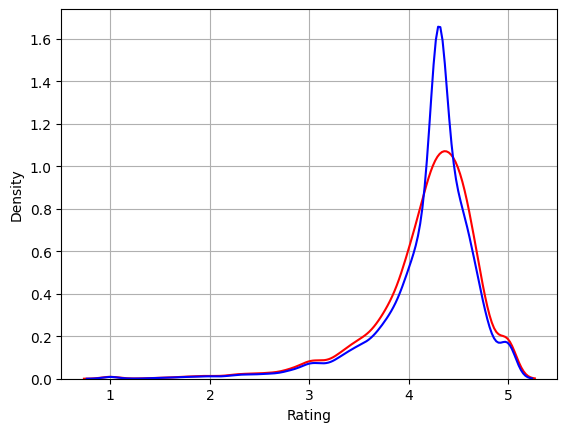

In [27]:
# Comparing and visualizing the column Rating2 with Rating whether it is correct to fill null values with median or not.
sns.kdeplot(df['Rating'], color = 'red')
sns.kdeplot(df['Rating2'], color = 'blue')

plt.grid()
plt.show()

***Inference:***

Here also, from this KDE plot we can see that the distribution of the values in this column is different from the distribution of the values when we fill the null values with the median of the column.

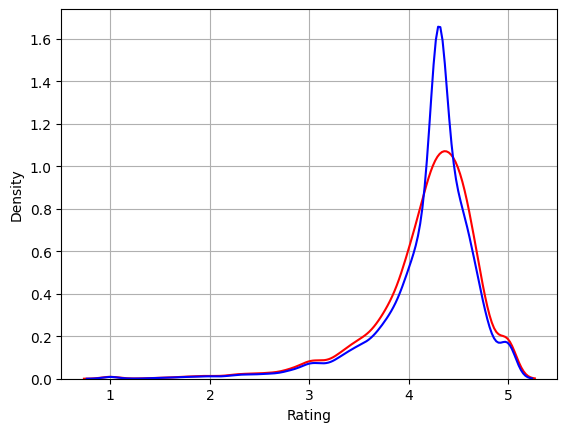

In [28]:
# Comparing and visualizing the column Rating3 with Rating whether it is correct to fill null values with mode or not.
sns.kdeplot(df['Rating'], color = 'red')
sns.kdeplot(df['Rating3'], color = 'blue')

plt.grid()
plt.show()

***Inference:***

In the above graph we filled the null values with the most frequent value of Rating column.But, from the graph as we can see the distribution is behaving much differently when we filled the null values with mode.



# From the above three graphs we could see that filling those null values with mean, median or mode won't be appropriate in this case .

# Let's try with zero.

In [29]:
# Creating another column which will hold the values of Rating column and the null values will be filled with 0.
df['Rating4'] = df['Rating'].fillna(0)

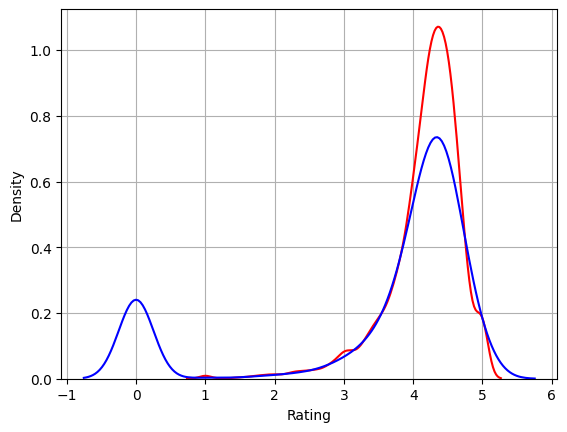

In [30]:
# Comparing and visualizing the column Rating4 with Rating whether it is correct to fill null values with 0 or not.
sns.kdeplot(df['Rating'], color = 'red')
sns.kdeplot(df['Rating4'], color = 'blue')

plt.grid()
plt.show()

***Inference:***

Unfortunately none of the technique worked, as we saw from those graphs plotted above. In order to come up with proper insights from the dataset we will have to drop those rows which contain null values in the Rating column.

*Let's continue.*

In [31]:
# Since the rows are in huge amount in which the null values are lying. Checking the percentage of null values in that particular column.
(df['Rating'].isnull().sum()/df.shape[0])*100

15.146495496428203

In [32]:
# Dropping those rows which contain null values in Rating column
df.dropna(axis = 0, subset = ['Rating'], inplace = True)

In [33]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
Rating1           0
Rating2           0
Rating3           0
Rating4           0
dtype: int64

In [34]:
# Checking for the datatype of the column Current Ver as it contains nulls.
df['Current Ver'].dtype

dtype('O')

In [35]:
# Checking the frequency count of the column Current Ver.
df['Current Ver'].value_counts()

Varies with device    1011
1.0                    449
1.1                    191
1.2                    125
2.0                    117
                      ... 
11.0.269 (m)             1
4.13.2                   1
13.0.16                  1
8.13.3                   1
0.3.4                    1
Name: Current Ver, Length: 2624, dtype: int64

***Inference:***

As per our business objective we will mostly be working with the columns such as Category, Rating, Review, Content Rating, Type, Price, Install and Last updated, if we fill the null values in the 'Current Ver' column with the most frequent value of the column it won't affect our data analysis. Hence, filling those rows with mode of the column.

Let's continue

In [36]:
# Replacing the null values in the 'Current Ver' column with the most frequent value.
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode()[0])

In [37]:
df['Android Ver'].value_counts()

4.1 and up            1811
4.0.3 and up          1141
4.0 and up            1042
Varies with device     947
4.4 and up             713
2.3 and up             547
5.0 and up             447
4.2 and up             316
2.3.3 and up           232
2.2 and up             203
3.0 and up             201
4.3 and up             185
2.1 and up             112
1.6 and up              87
6.0 and up              42
7.0 and up              41
3.2 and up              31
2.0 and up              27
1.5 and up              16
5.1 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              5
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [38]:
# Replacing null values in Android Ver column with the most frequent value.
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])

***Inference:***

The column 'Android ver' has null values only in two rows, replaing them with mode won't affect our analysis.

*Let's continue.*


In [39]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Rating1           0
Rating2           0
Rating3           0
Rating4           0
dtype: int64

In [40]:
# Dropping those three column which was created for statistical analysis.
df.drop(['Rating1','Rating2','Rating3','Rating4'], axis = 1, inplace = True)

# As we are done with the Data Cleaning process, now we can start with Data Processing.

***Let's start.***

In [41]:
# Checking the information about the dataset before staring Data Processing.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   object 
 4   Size            8196 non-null   object 
 5   Installs        8196 non-null   object 
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   object 
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8196 non-null   object 
 12  Android Ver     8196 non-null   object 
dtypes: float64(1), object(12)
memory usage: 896.4+ KB


# Data Processing

In [42]:
# Checking the datatype of Review column
df['Reviews'].dtype

dtype('O')

In [43]:
# Checking the frequency of the values of the column reviews.
df['Reviews'].value_counts()

2         82
3         76
4         74
5         74
1         67
          ..
263525     1
17202      1
57573      1
8258       1
398307     1
Name: Reviews, Length: 5321, dtype: int64

***Inference:***

The values in 'Reviews' column are numeric however the datatype of the column is Object. It is important to convert the datatype into integer for further analysis.

In [44]:
# Converting datatype of Reviews column into integer.
df['Reviews'] = df['Reviews'].astype(int)

In [45]:
# Checking the datatype of the column Reviews.
df['Reviews'].dtype

dtype('int64')

In [46]:
# Checking the statistics of the column reviews in one go.
df['Reviews'].describe()

count    8.196000e+03
mean     2.552515e+05
std      1.985594e+06
min      1.000000e+00
25%      1.260000e+02
50%      3.004000e+03
75%      4.381300e+04
max      7.815831e+07
Name: Reviews, dtype: float64

# Checking for any outliers present in Reviews column

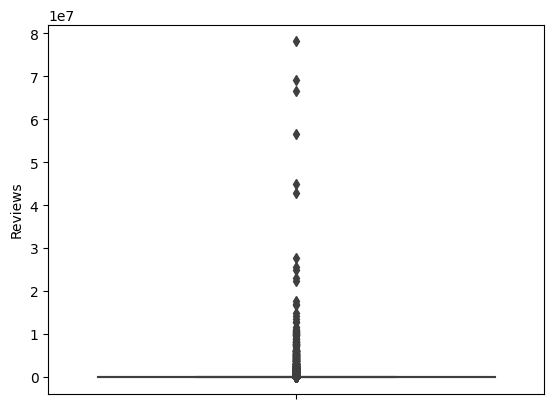

In [47]:
# Visualizing the 5 number summary by plotting boxplot.
sns.boxplot(data = df, y = 'Reviews')

plt.show()

***Inference:***

It is seen that Reviews column contains outliers in most of the rows.

*Let's find out.*

In [48]:
# Creating lower_limit below which the values will be considered as outlier same as for upper_limit above which the values will be considered as outlier.
mean = df['Reviews'].mean()
lower_limit = mean - 3*df['Reviews'].std()
upper_limit = mean + 3*df['Reviews'].std()

In [49]:
# Checking the data above upper limit. And it is seen that the values are accurate and valid.
df[df['Reviews'] > upper_limit]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40M,"500,000,000+",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
403,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device
406,BBM - Free Calls & Messages,COMMUNICATION,4.3,12842860,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
449,"Truecaller: Caller ID, SMS spam blocking & Dialer",COMMUNICATION,4.5,7820209,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
699,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device


In [50]:
# Checking the data below limit.
df[df['Reviews'] < lower_limit]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


*Inference:*

The data below upper limit and lower limit seems to be valid and accurate. We don't need to change anything here. 

In [51]:
# Checking the frequency count of the column Installs.
df['Installs'].value_counts()

1,000,000+        1415
100,000+          1094
10,000+            987
10,000,000+        937
1,000+             697
5,000,000+         607
500,000+           504
50,000+            457
5,000+             425
100+               303
50,000,000+        202
500+               199
100,000,000+       188
10+                 69
50+                 56
500,000,000+        24
1,000,000,000+      20
5+                   9
1+                   3
Name: Installs, dtype: int64

***Inference:***

The data in Installs column we have is supposed to be 'Integer' however the datatype of the column is 'Object'. We need to get rid off these unnecessaryly apperaing characters such as '+' and ',' in this case and convert the datatype into 'Integer' for our further analysis.

*Let's continue.*

In [52]:
# Stripping '+' which is added at the end of every values in Installs column.
df['Installs'] = df['Installs'].apply(lambda x: x.strip('+').replace(',', ''))

In [53]:
# Converting the datatype of Installs column into integer.
df['Installs'] = df['Installs'].astype(int)

In [54]:
# Checking the datatype.
df['Installs'].dtype

dtype('int64')

In [55]:
# Checking the frequency count of the column Type.
df['Type'].value_counts()

Free    7592
Paid     604
Name: Type, dtype: int64

In [56]:
# Creating a function which will return 1 if Type column contains Paid or it will return 0 if the Type column contain Free.
def str_to_int(column):
  if column == 'Free':
    return 0
  else:
    return 1

In [57]:
# Creating a new column on Type which will contain values as 0 and 1 so that we can treat it as a numerical column for our convenience.
df['Type_numeric'] = df['Type'].apply(str_to_int)

In [58]:
# Checking frequency count of the column Price.
df['Price'].value_counts()

0          7592
$2.99       109
$0.99       104
$4.99        68
$1.99        59
           ... 
$1.59         1
$6.49         1
$1.29         1
$299.99       1
$1.20         1
Name: Price, Length: 73, dtype: int64

***Inference:***

The datatype of the 'Price' column is suppossed to be float whereas it is 'object' datatype we need to convert the datatype into float and also need to remove any unnecessary characters attach with the values such as '$' in this case.

In [59]:
# The values of Price column has '$' attached with it which makes it object datatype. Thus stripping this '$' for our convenience.
df['Price'] = df['Price'].apply(lambda x: x.strip('$'))

In [60]:
# Converting the datatype into float.
df['Price'] = df['Price'].astype(float)

In [61]:
df['Size'].value_counts()

Varies with device    1169
14M                    149
12M                    146
11M                    144
13M                    143
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 414, dtype: int64

***Inference:***

"Size" column has M and k attached with values. 'M' as MB and 'K' as 'KB'. We need to remove those not required strings for better analysis.

In [62]:
# Creating a function which will conver byte string to byte and return a numeric value.
def byte_to_num(string):
  if 'M' in string:
    string = str(int(float(string.replace('M',''))*1000000))
  elif 'k' in string:
    string = str(int(float(string.replace('k',''))*1000))
  elif 'Varies with device' in string:
    string = '0'
  else:
    pass
  return string

In [63]:
# Applying the function to "Size" column.
df['Size'] = df['Size'].apply(byte_to_num)

In [64]:
# Converting the datatype into ineger.
df['Size'] = df['Size'].astype(int)

In [65]:
# Checking the values of the column "Size".
df['Size'].value_counts()

0           1169
14000000     149
12000000     146
11000000     144
13000000     143
            ... 
383000         1
454000         1
812000         1
442000         1
619000         1
Name: Size, Length: 413, dtype: int64

In [66]:
# Checking the frequency count of the column Last Updated.
df['Last Updated'].value_counts()

August 3, 2018       245
August 2, 2018       210
August 1, 2018       199
July 31, 2018        189
July 30, 2018        148
                    ... 
October 22, 2014       1
April 9, 2012          1
November 22, 2012      1
February 18, 2015      1
March 23, 2014         1
Name: Last Updated, Length: 1300, dtype: int64

***Inference:***

The column 'Last updated' contains values in the format 'Month, Date, Year. This column is important for our EDA, we better extract the years from every rows for our analysis.

In [67]:
# Creating a new column called 'Last updated year' which will hold the year in which the apps were last updated.
df['Last updated year'] = df['Last Updated'].apply(lambda x: x.split(',')).apply(lambda x: x[1]).astype(int)

In [68]:
# Checking the most frequent value in descending order.
df['Last updated year'].value_counts()

2018    5450
2017    1426
2016     628
2015     379
2014     184
2013      92
2012      21
2011      15
2010       1
Name: Last updated year, dtype: int64

# As we are done with data cleaning and data processing, let's start with our data analysis and data vidualization.

*   We have checked and handled duplicate rows that were present in our dataset.

*   We have delt with missing values.

*   The outliers in our dataset was handled properly.

*   We also added some new column which we might require in our Exploratory Data Analysis.

Now we are required to gain some valuable insights from our dataset which will be helpful for the business growth.

***Let's Start.***

# Univariate analysis

In [69]:
# Checking the frequnecy count of the column Category.
df['Category'].value_counts().head(10)

FAMILY             1608
GAME                912
TOOLS               718
FINANCE             302
PRODUCTIVITY        301
LIFESTYLE           301
PERSONALIZATION     298
MEDICAL             290
BUSINESS            263
PHOTOGRAPHY         263
Name: Category, dtype: int64

## 1. Find out the app share in the Play Store category-wise to determine the distribution of apps across different categories.

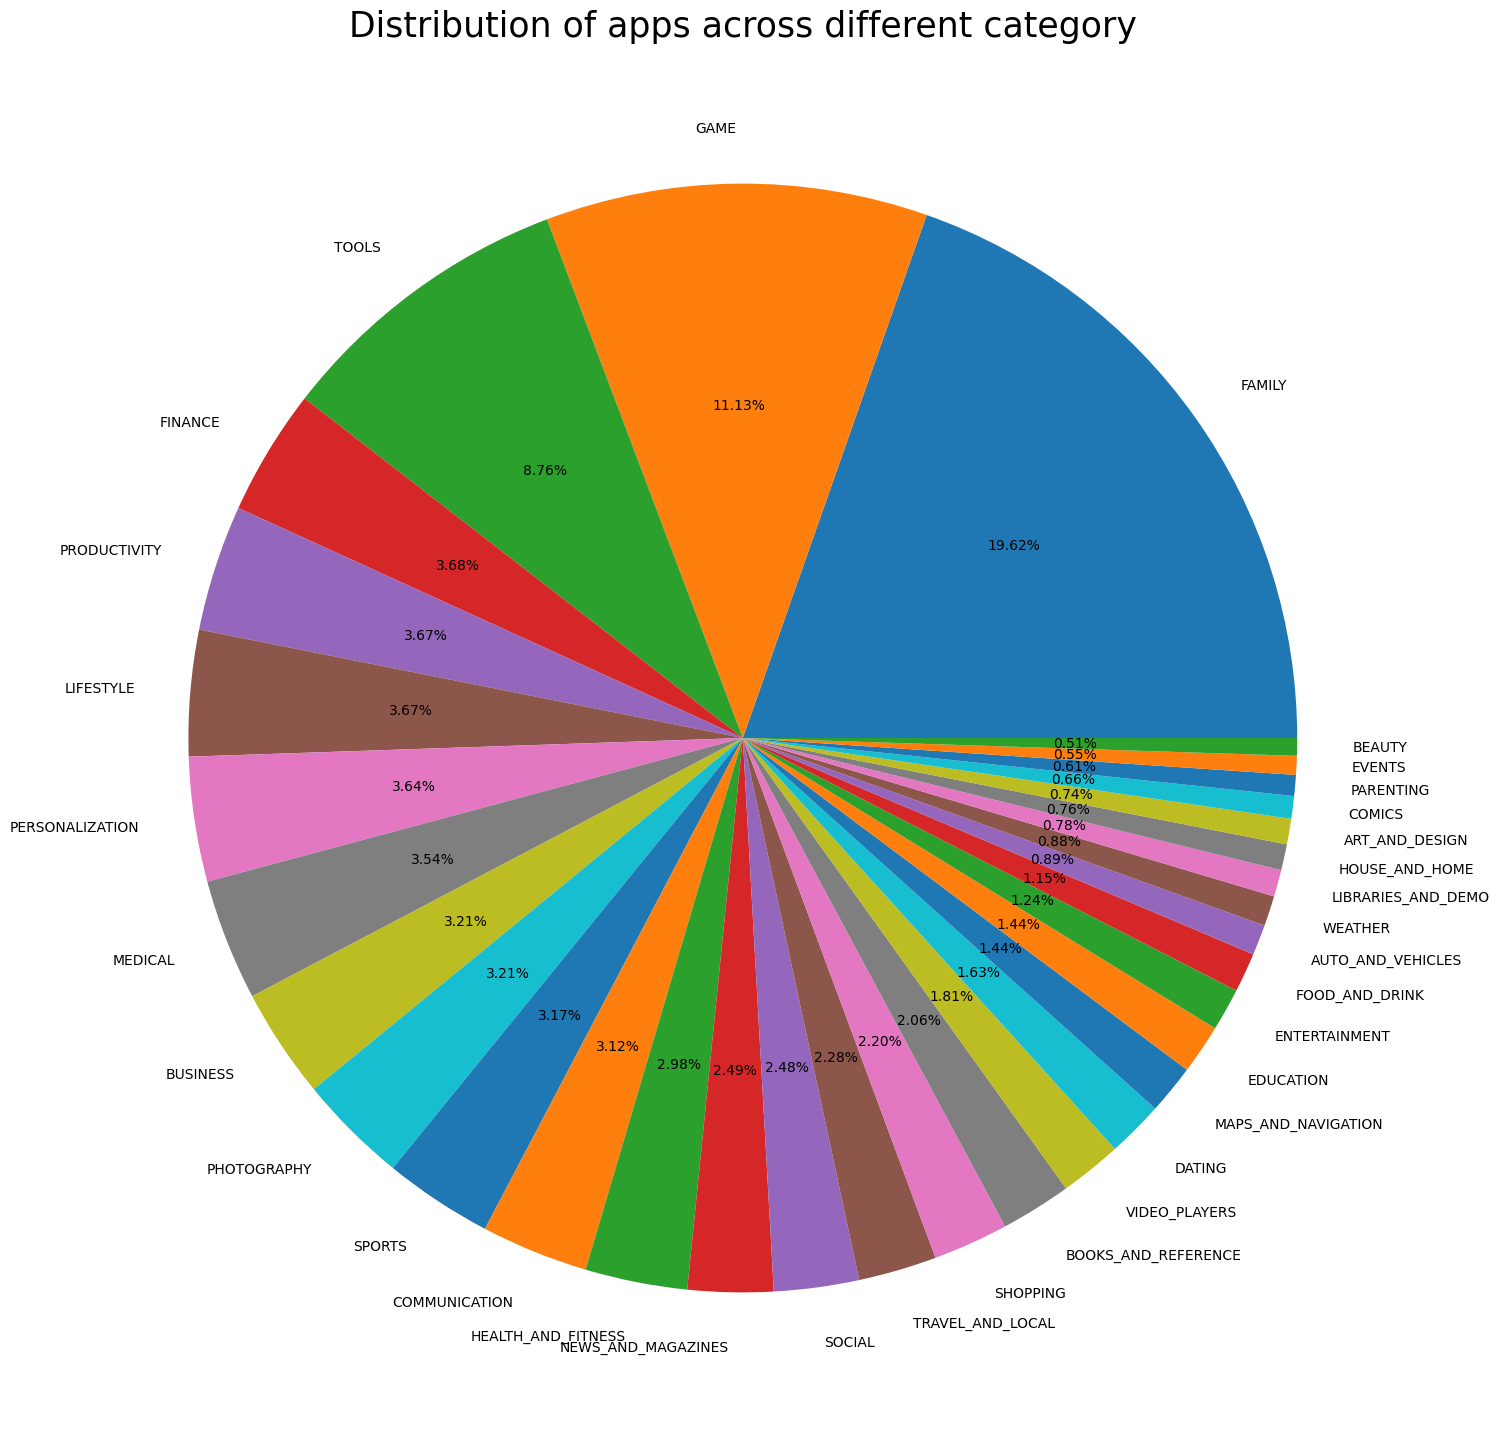

In [70]:
# Plotting the percentage of the total number of apps that are present in every category across our dataset.
plt.figure(figsize=(18,18))
plt.pie(df.Category.value_counts(), labels=df.Category.value_counts().index, autopct='%1.2f%%')

plt.title('Distribution of apps across different category', fontsize = 25)
plt.show()

***Inference:***

A pie chart is a circular graph that visually showing the proportion of app shares in different categories within our dataset. Each category is represented by a slice of the pie, with its size reflecting the number of app shares. By comparing the sizes of the slices, viewers can quickly understand the popularity of each category. Overall, a pie chart provides a clear and concise representation of the distribution of app shares across categories.

Here, in this pie chart we can see that the maximum number of apps belong to the family category in our dataset which hold 19.61% among all share of categories followed by Games, Tools, Finans, Productivity which shares 11.13%, 8.76%, 3.68% and 3.67% respectively.

# 3. Find out the rating distribution among all the apps.

In [71]:
df['Rating'].value_counts()

4.3    897
4.4    895
4.5    848
4.2    810
4.6    683
4.1    621
4.0    513
4.7    442
3.9    359
3.8    286
5.0    271
3.7    224
4.8    221
3.6    167
3.5    156
3.4    126
3.3    100
4.9     85
3.0     81
3.1     69
3.2     63
2.9     45
2.8     40
2.6     24
2.7     23
2.5     20
2.3     20
2.4     19
1.0     16
2.2     14
2.0     12
1.9     11
1.7      8
1.8      8
2.1      8
1.6      4
1.4      3
1.5      3
1.2      1
Name: Rating, dtype: int64

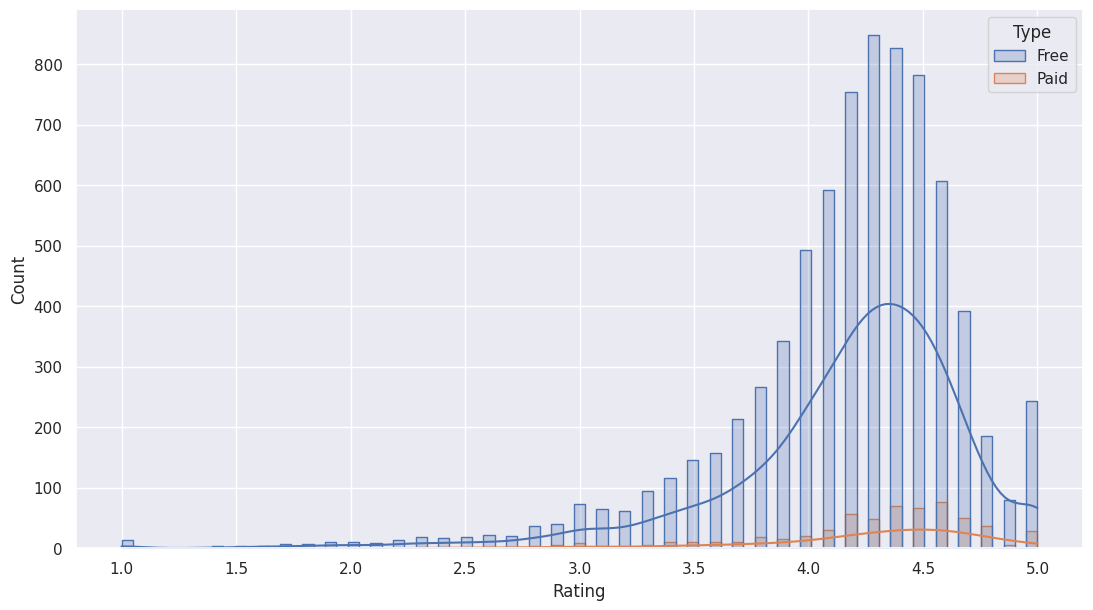

In [141]:
# Plotting the distribution of rating across the dataset.
fig, ax = plt.subplots(figsize=(13, 7))
sns.histplot(data=df, x='Rating', hue='Type', element='step', ax=ax, kde = True)
plt.show()

***Inference:***

In the above graph histplot is used to create a histogram of the 'Rating' column in our dataframe. By setting kde=True, a kernel density estimation plot is also overlaid on the histogram, which is providing additional insights into the rating distribution.

In the resulting plot we can see the distribution of ratings, with the x-axis representing the rating values and the y-axis representing the count or density of apps in each rating range.

It it good to see here that most of the apps got rating between 4 - 5. We also tried to disply the type of app here(Paid/Free), which also can give us a glimps of the relationship between type of ratings.  

# 4. Find out the price distribution of each category.

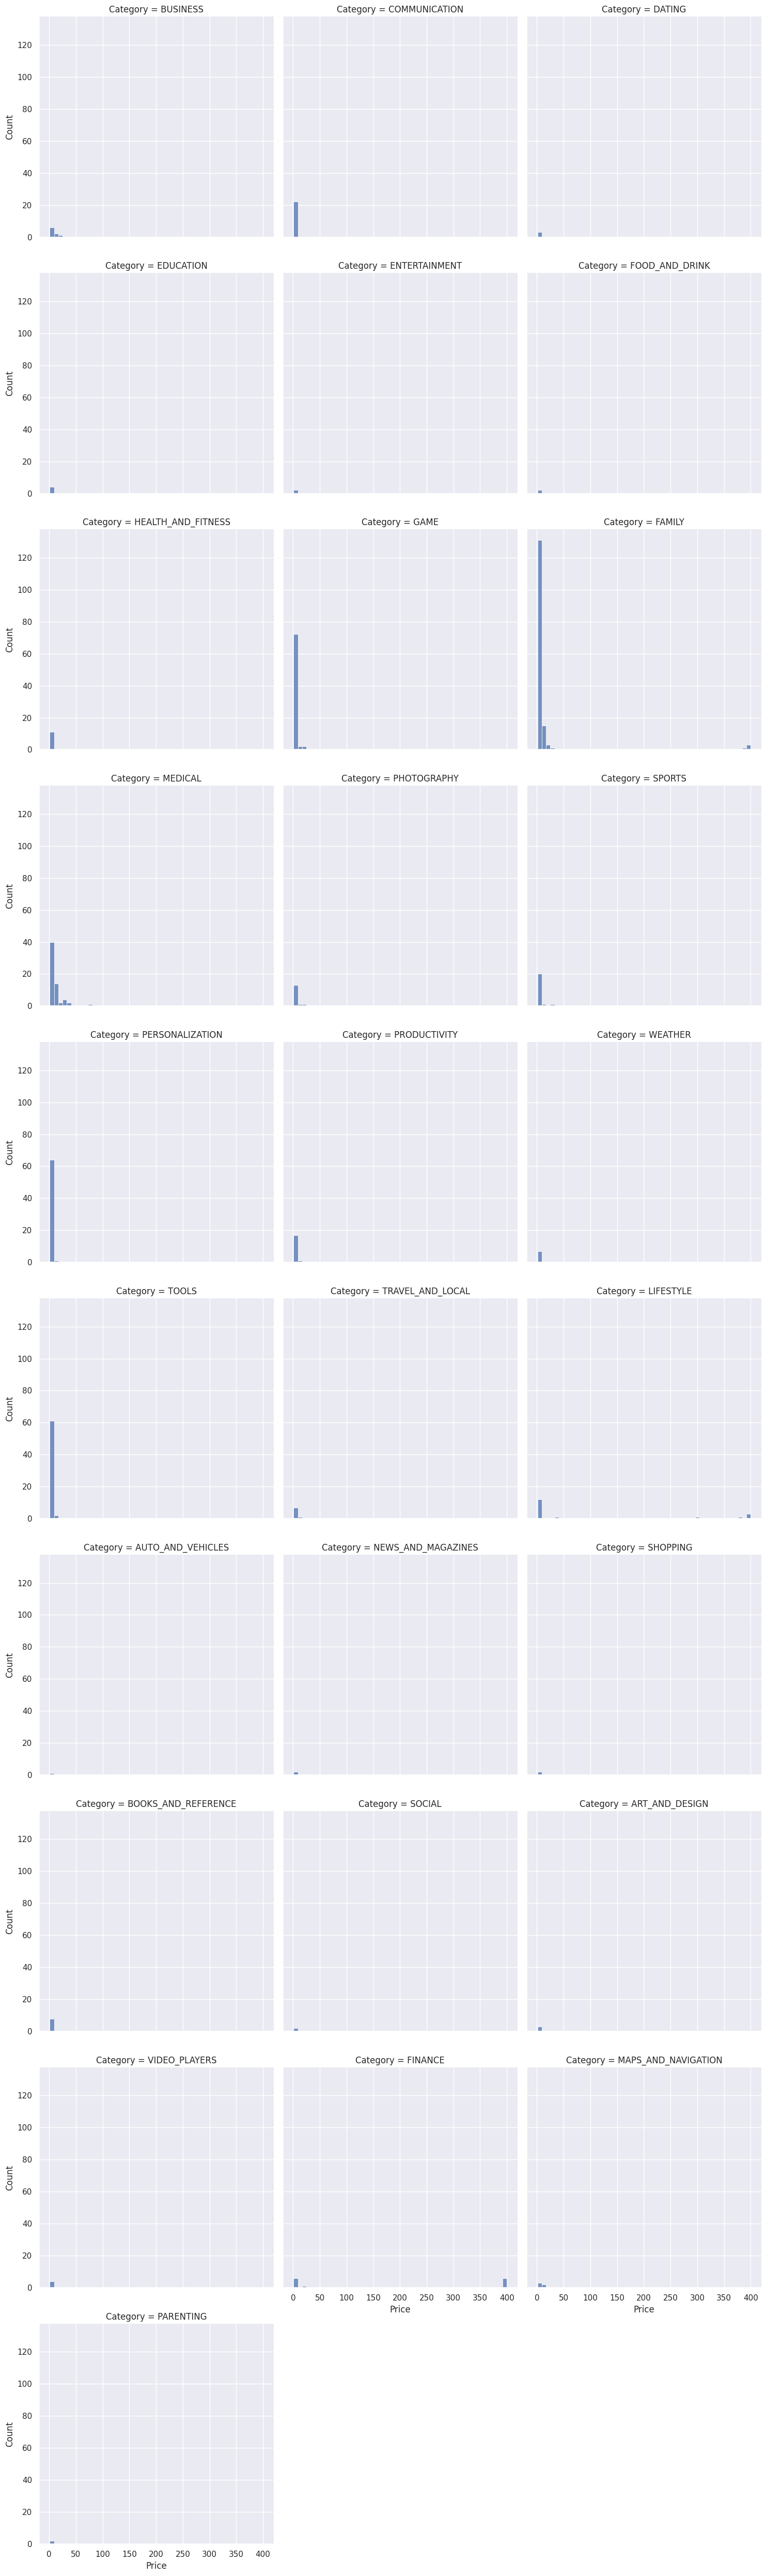

In [146]:
# Price distribution of each category
sns.displot(data = df[df['Price'] > 0], x = 'Price', kind = 'hist', bins = 50,  col = 'Category', col_wrap = 3)
plt.show()

***Inference:***

The graph shows a visual representation of the price distribution for each category of apps. By examining the histograms, we can observe how prices are distributed across different app categories.

We can see in the above graph that the price are close to 0 in every category. There are very few category in which the prices are higher such as Finance, Lifestyle, Medical, Sports, Family, Game, Business.

Let's find out the potential of these categories.

# 5. Identify the most commonly accessed or frequently used content in the dataset.

In [148]:
# Checking frequency count of the column Content Rating.
df['Content Rating'].value_counts().head(5)

Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Name: Content Rating, dtype: int64

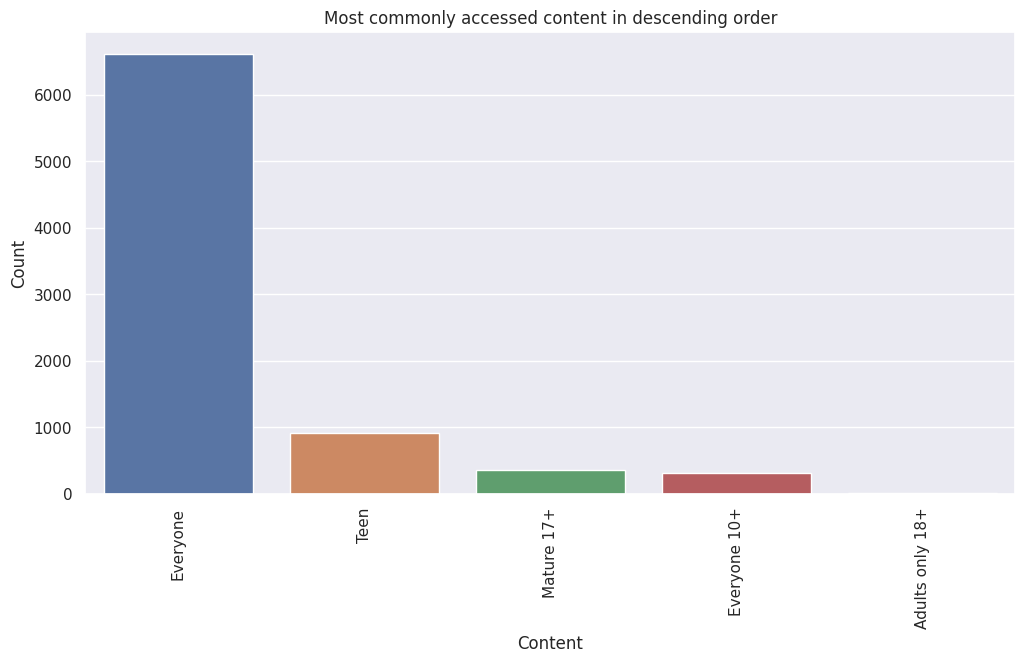

In [151]:
# Plotting the most commonly accessed or frequently used content in descending order using barplot.
plt.figure(figsize = (12,6))

sns.barplot(data = df, x = df['Content Rating'].value_counts().head(5).index, y = df['Content Rating'].value_counts().head(5))
plt.title("Most commonly accessed content in descending order")
plt.xlabel("Content")
plt.ylabel("Count")
plt.xticks(rotation = 90)

plt.show()

***Inference:***


In the above graph the barplot is allowing us to compare the frequency or count of different content ratings in a visually appealing manner. It is using the length of bars to represent the count or frequency of each category, making it easy to identify and compare the most commonly accessed content ratings.

The graph shows the most commonly accessed content ratings in descending order. By analyzing the graph, we can see that the content which is for everyone is the most prevalent among all the content. Above 6000 apps are for everyone in this dataset. Followed by teen which is below 1000.

# 6. Find out the years in which most of the apps were last updated.

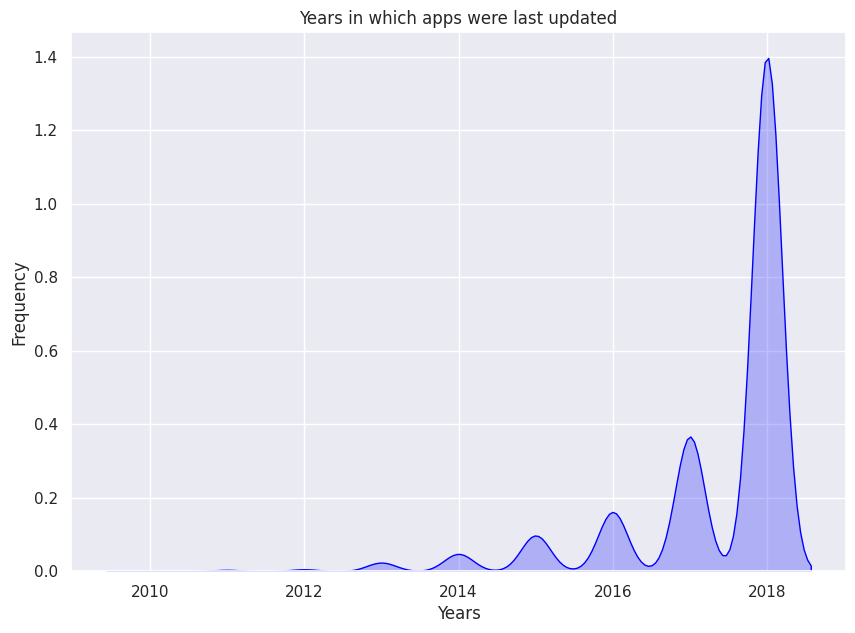

In [79]:
# plotting the years in which most of the apps were last updated with the help of KDEplot.
plt.figure(figsize=(10,7))

plt.xlabel("Years")
plt.ylabel("Frequency")
graph = sns.kdeplot(df["Last updated year"], color="Blue", shade = True)
plt.title('Years in which apps were last updated');

plt.show()

***Inference:*** 

As the given data is numeric(Last updated year) here the Kdeplot is helpful in this context because it allows us to visualize the distribution of the "Last updated year" variable as a smooth curve, known as a kernel density estimate (KDE). KDE plots provide a smooth representation of the underlying distribution of a variable

This graph shows the distribution of the years in which the apps were last updated. Here we can see that most of the apps were last updated in 2018 which is very current. Let's find out if there any relationship between this column and the other variables.

# Bivariate Analysis

In [80]:
# Checking the columns.
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Type_numeric', 'Last updated year', 'Rating_str'],
      dtype='object')

# 7. Find out the top rated categories.

In [81]:
# Creating a group of Rating Category wise.
rating_category = df.groupby('Category')['Rating'].mean().reset_index().sort_values(by = 'Rating', ascending = False)

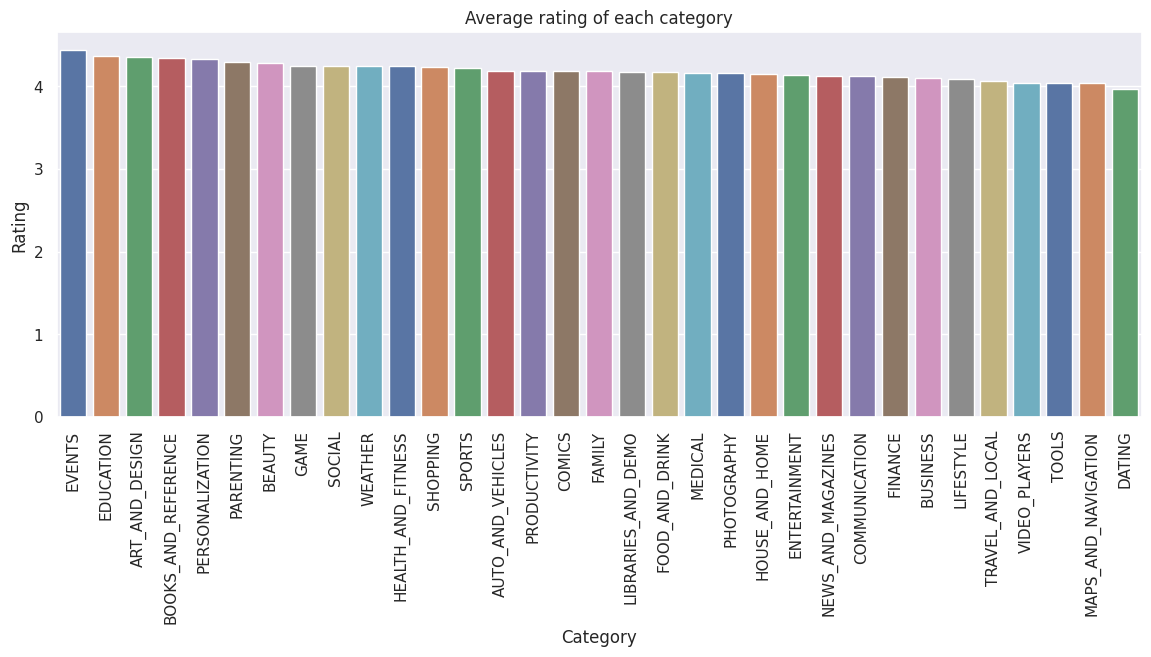

In [82]:
# Visualizing the average rating of each category.
plt.figure(figsize = (14,5))

sns.set(style="darkgrid")
sns.barplot(data = rating_category, x = rating_category['Category'], y = rating_category['Rating'], palette = 'deep')

plt.title('Average rating of each category')
plt.xticks(rotation=90)
plt.show()

***Inference:***

What we can see in this graph is although the top rated categories are Events, Education, Art_and_Design, Books_and_Reference etc, all of the categories are rated above 4 on an average.

# 8. Find out those categories which got maximum number of reviews.

In [83]:
# Creating groups of sum of reviews of each category.
review_category = df.groupby('Category')['Reviews'].sum().reset_index().sort_values(by = 'Reviews', ascending = False)

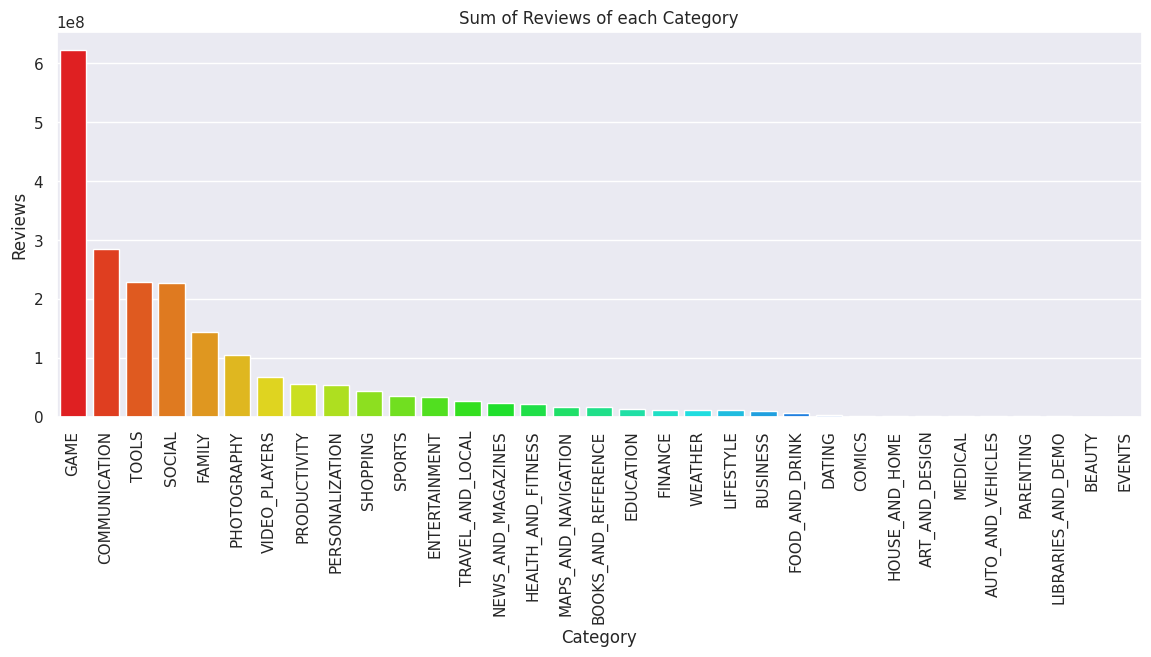

In [84]:
# Plotting the sum of reviews of each category in descending order.
plt.figure(figsize = (14,5))

sns.set(style="darkgrid")
sns.barplot(data = review_category, x = review_category['Category'], y = review_category['Reviews'], palette = 'gist_rainbow')
plt.title('Sum of Reviews of each Category')
plt.xticks(rotation = 90)

plt.show()

# 9. Find out the most installed categories.

In [85]:
# Creating groups of sum of Installs of each category.
install_category = df.groupby('Category')['Installs'].sum().reset_index().sort_values(by= 'Installs', ascending = False)

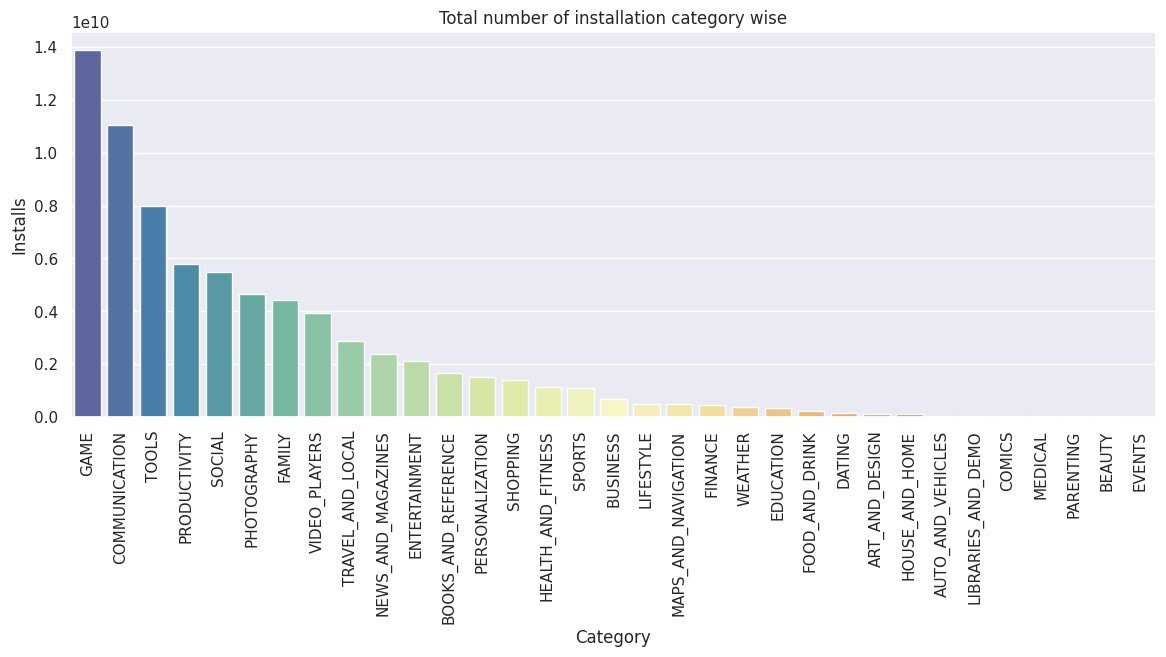

In [86]:
# Plotting total number of installation category wise in descending order.
plt.figure(figsize = (14,5))
sns.set(style="darkgrid")
sns.barplot(data = install_category, x = install_category['Category'], y = install_category['Installs'], palette = 'Spectral_r')

plt.title('Total number of installation category wise')
plt.xticks(rotation = 90)
plt.show()

# 10. Find out the app categories in the Play Store that have the highest average prices.

In [87]:
# Creating group of each category and their average price.
price_category = df.groupby('Category')['Price'].mean().reset_index().sort_values(by = 'Price', ascending = False)

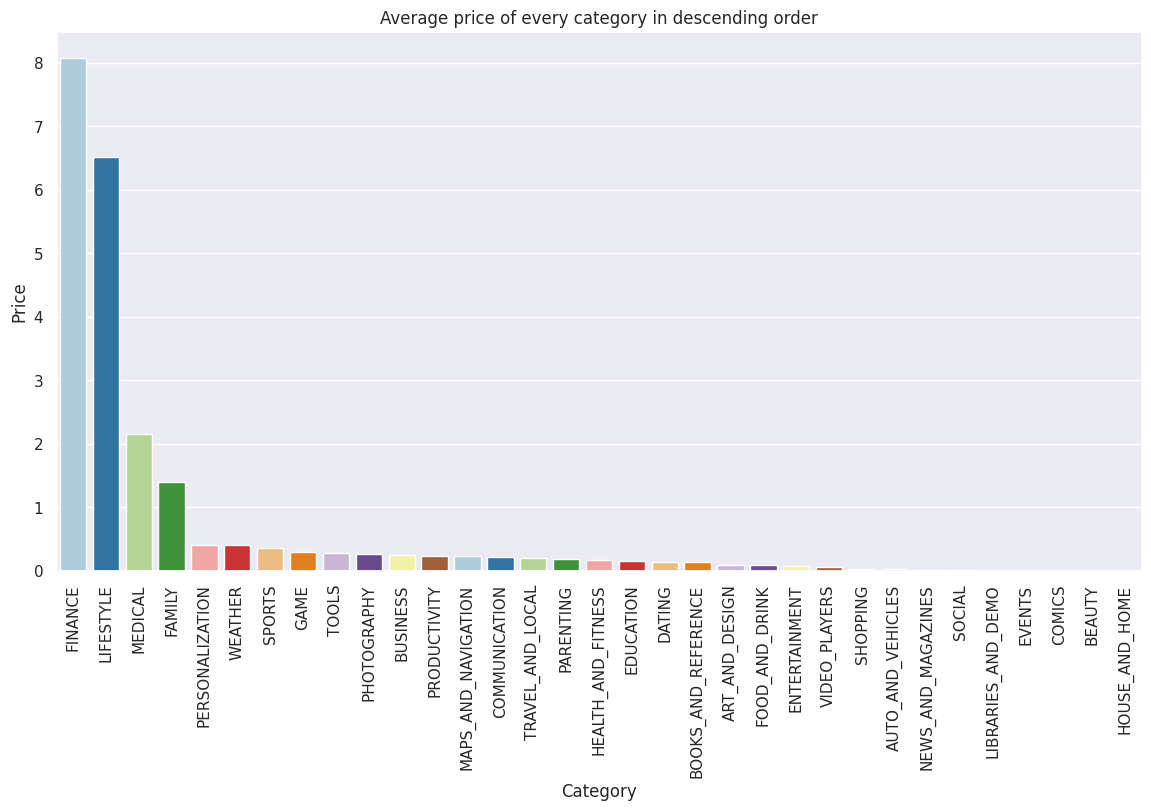

In [88]:
# Plotting average price of each category in decsending order.
plt.figure(figsize = (14,7))
sns.set(style="darkgrid")
sns.barplot(data = price_category, x = price_category['Category'], y = price_category['Price'], palette = 'Paired')

plt.title('Average price of every category in descending order')
plt.xticks(rotation = 90)
plt.show()

# 11. Find out the average rating of free and paid apps.

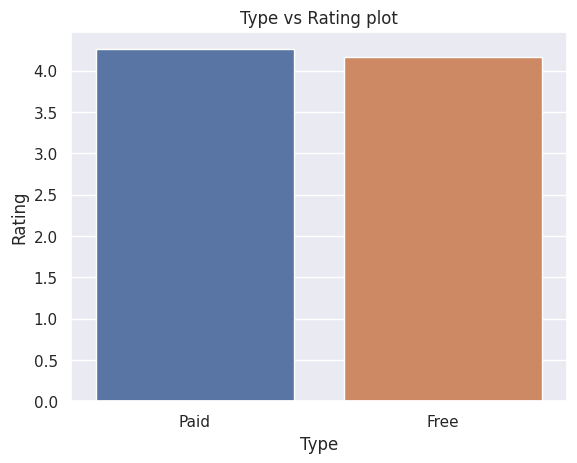

In [89]:
# Creating group of type wise average rating and visualizing with barplot.
type_rating = df.groupby('Type')['Rating'].mean().reset_index().sort_values(by = 'Rating', ascending = False)
sns.set(style="darkgrid")
sns.barplot(data = type_rating, x = 'Type', y = 'Rating')

plt.title('Type vs Rating plot')
plt.show()

# 12. Identify the type of apps that are mostly installed(paid or free).

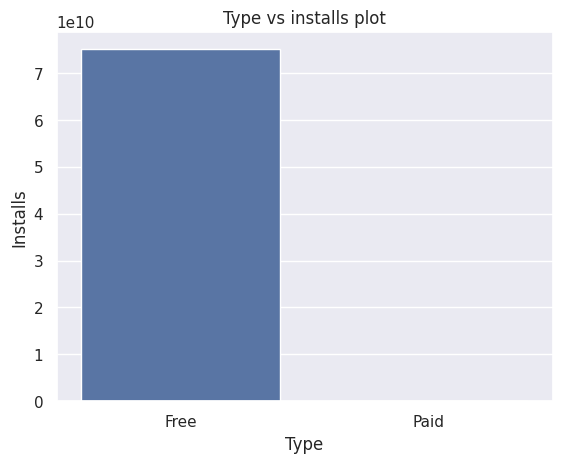

In [90]:
# Creating groups of sum of total installation type wise and visualizing with barplot.
type_installs = df.groupby('Type')['Installs'].sum().reset_index().sort_values(by = 'Installs', ascending = False)
sns.set(style="darkgrid")
sns.barplot(x = type_installs['Type'], y = type_installs['Installs'])
plt.title('Type vs installs plot')
plt.show()

# 13. Find out which contents were mostly installed by users. 

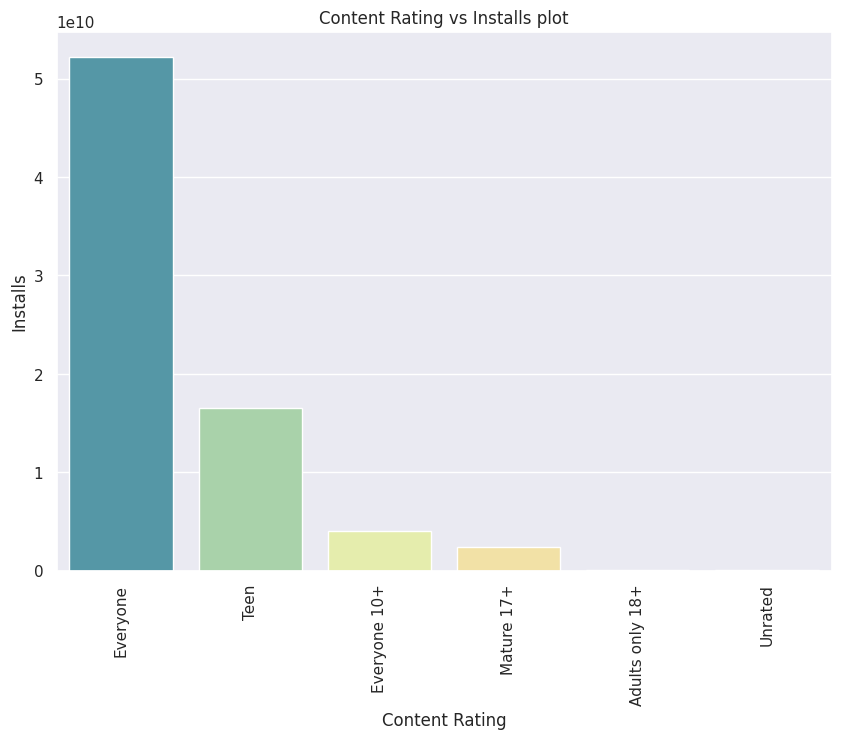

In [91]:
# Creating groups content rating wise sum of Installs and plotting with the help of barplot.
plt.figure(figsize = (10,7))
Installs_content_rating = df.groupby('Content Rating')['Installs'].sum().reset_index().sort_values(by = 'Installs', ascending = False)
sns.set(style="darkgrid")
sns.barplot(x = Installs_content_rating['Content Rating'], y = Installs_content_rating['Installs'], palette = 'Spectral_r')
plt.xticks(rotation = 90)
plt.title('Content Rating vs Installs plot')
plt.show()

In [92]:
# Checking the columns.
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Type_numeric', 'Last updated year', 'Rating_str'],
      dtype='object')

# 14. Find the percentage of the total number of paid & free apps in each category.

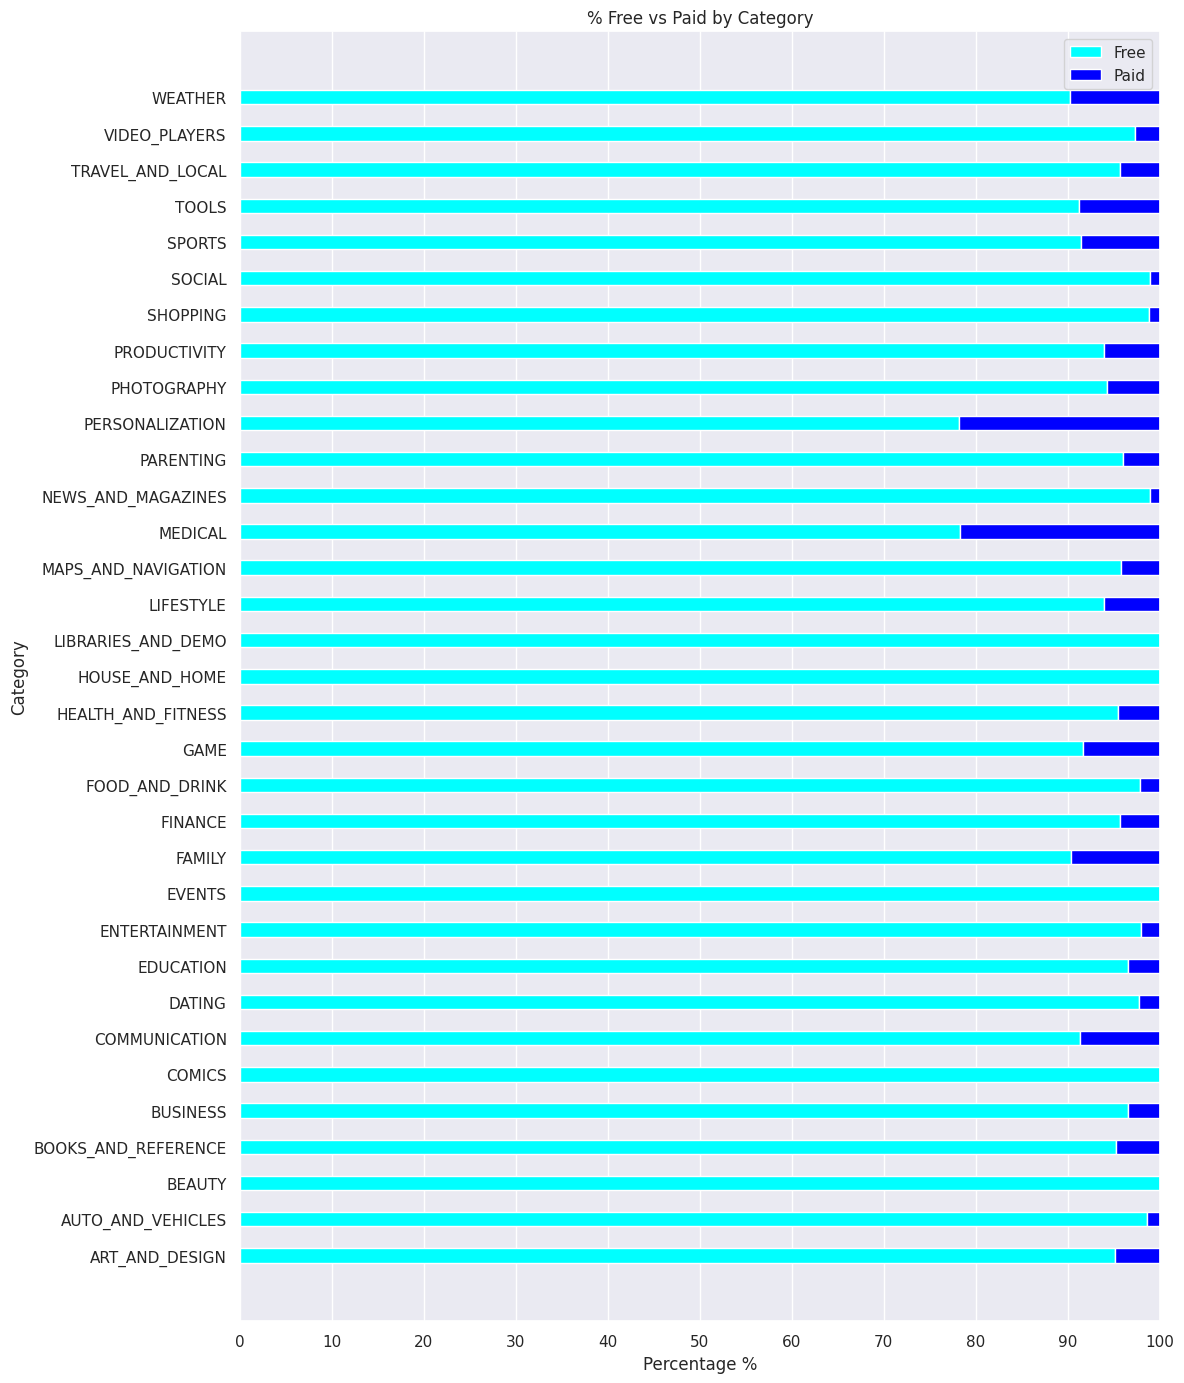

In [93]:
type_group = df.groupby('Type')
category_group = df.groupby('Category')

free_group = type_group.get_group('Free').groupby('Category')
free_perc = round((free_group.size() / category_group.size()) * 100, 1)

paid_group = type_group.get_group('Paid').groupby('Category')
paid_perc = round((paid_group.size() / category_group.size()) * 100, 1)

fig, ax = plt.subplots(figsize=(12, 14))

bar_width = 0.4
bar_positions = np.arange(len(category_group))

ax.barh(bar_positions, free_perc, height=bar_width, color='#00FFFF', label='Free')
ax.barh(bar_positions, paid_perc, height=bar_width, left=free_perc, color='#0000FF', label='Paid')

ax.set_xlabel('Percentage %')
ax.set_ylabel('Category')
ax.set_title('% Free vs Paid by Category')
ax.set_xticks(range(0, 110, 10))
ax.set_yticks(bar_positions)
ax.set_yticklabels(category_group.groups.keys())
ax.legend()

plt.tight_layout()
plt.show()

# 15. Find the category which generated the maximum number of reviews through installation.

In [94]:
# Creating a dataframe which is paid
paid_apps = df[df['Type'] == 'Paid']

In [95]:
# Creating a column Revenue, which will hold the revenue generated by each apps through installation. Formula : (Revenue = Price * Installation)
paid_apps['Revenue'] = paid_apps['Price'] * paid_apps['Installs']

In [96]:
# Checking everything about the category which has generated the maximum number of revenue
paid_apps[paid_apps['Revenue'] == paid_apps['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type_numeric,Last updated year,Rating_str,Revenue
2241,Minecraft,FAMILY,4.5,2376564,0,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,1,2018,Top rated,69900000.0


# 16. Identify the top 10 apps which belong to the maximum revenue generated category.

In [97]:
# Finding out the top ten revenue generated apps in Family category.
family_apps = paid_apps[paid_apps['Category'] == 'FAMILY']
top_10_apps = family_apps.sort_values(by = ['Revenue'], ascending = False)['App'].head(10)
top_10_apps

2241                     Minecraft
5354                I am Rich Plus
5366                     I Am Rich
2242    Card Wars - Adventure Time
8860                   Bloons TD 5
9154         NBA JAM by EA SPORTS™
5362                 I Am Rich Pro
9678             Where's My Water?
8726               DRAGON QUEST VI
9478          Farming Simulator 16
Name: App, dtype: object

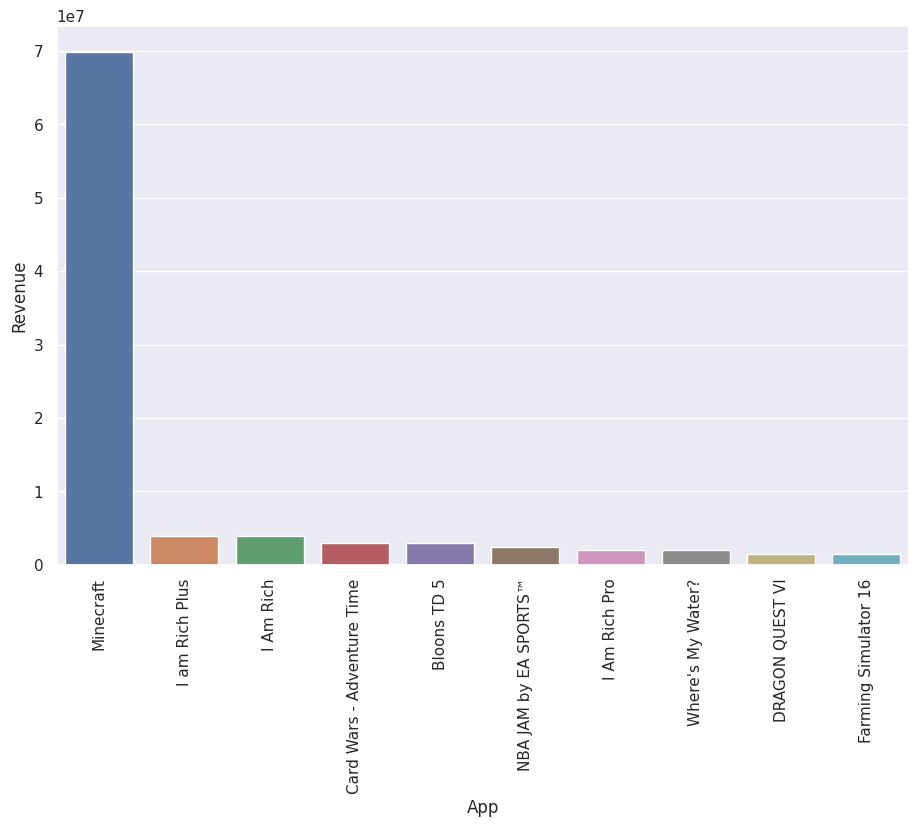

In [98]:
# plotting the top 10 revenue generated apps in family category in descending order.
plt.figure(figsize = (11,7))
sns.barplot(x = top_10_apps, y = paid_apps.loc[top_10_apps.index,'Revenue'])
plt.xticks(rotation = 90)
plt.show()

# 17. Find out if there any correlation between last updated year and installs for the top 5 installed categories 

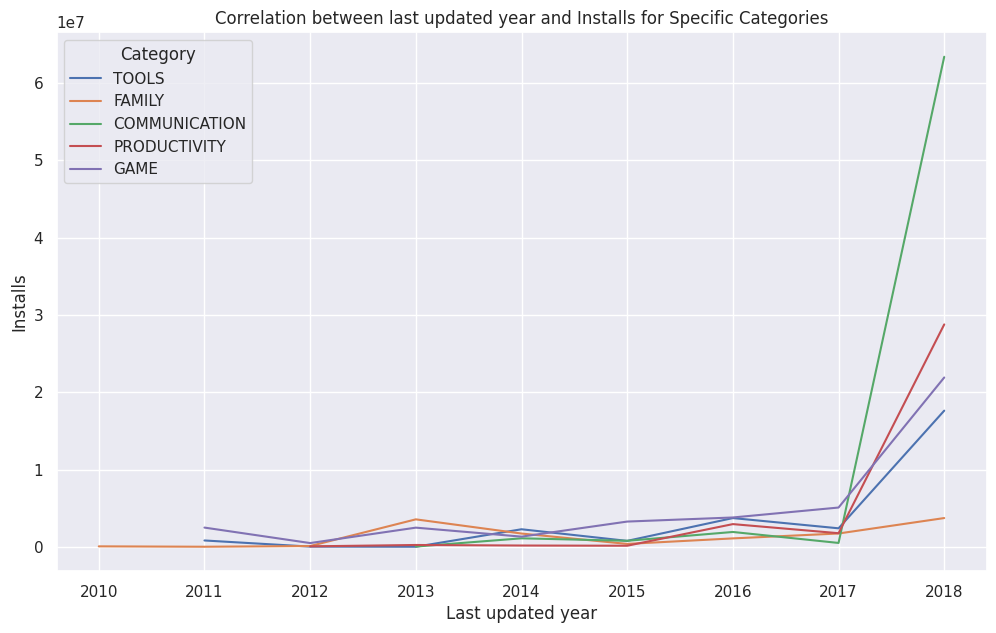

In [99]:
plt.figure(figsize=(12, 7))

categories_to_plot = ['GAME', 'COMMUNICATION', 'FAMILY', 'TOOLS','PRODUCTIVITY']
filtered_data = df[df['Category'].isin(categories_to_plot)]
install_year_category = filtered_data.groupby(['Last updated year', 'Category'])['Installs'].mean().reset_index()
install_year_category = install_year_category.sort_values(by='Installs')
sns.lineplot(x='Last updated year', y='Installs', hue='Category', data=install_year_category)

plt.title("Correlation between last updated year and Installs for Specific Categories")
plt.legend(title='Category')
plt.show()

# 18.  Find out if there any correlation between last updated year and rating.

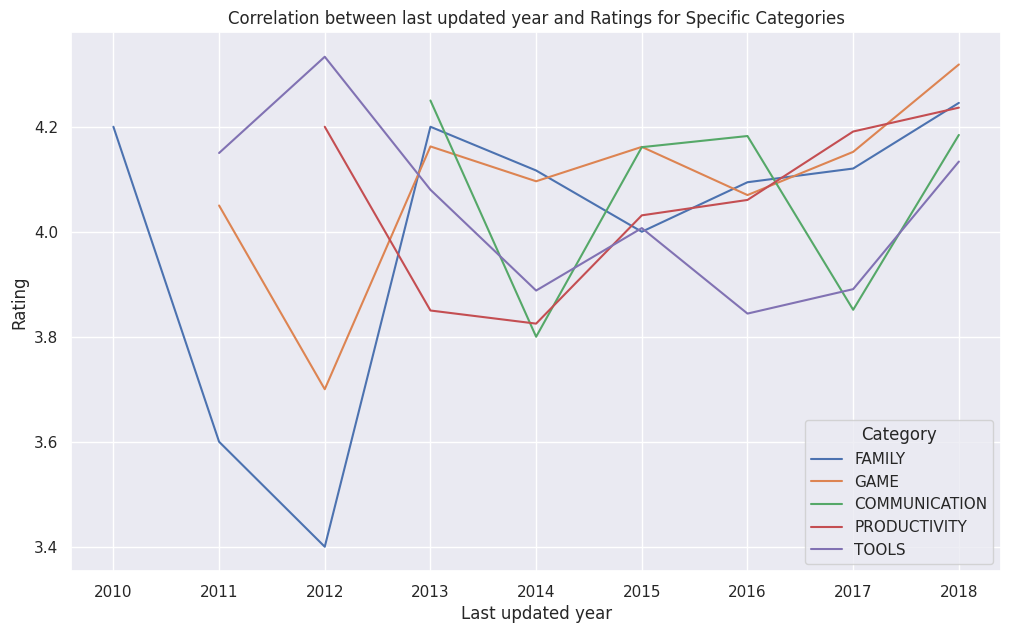

In [100]:
plt.figure(figsize=(12, 7))

categories_to_plot = ['GAME', 'COMMUNICATION', 'FAMILY', 'TOOLS','PRODUCTIVITY']
filtered_data = df[df['Category'].isin(categories_to_plot)]
install_year_category = filtered_data.groupby(['Last updated year', 'Category'])['Rating'].mean().reset_index()
install_year_category = install_year_category.sort_values(by='Rating')
sns.lineplot(x='Last updated year', y='Rating', hue='Category', data=install_year_category)

plt.title("Correlation between last updated year and Ratings for Specific Categories")
plt.legend(title='Category')
plt.show()

# 19. Find if there any correlation between Ratings and installs.

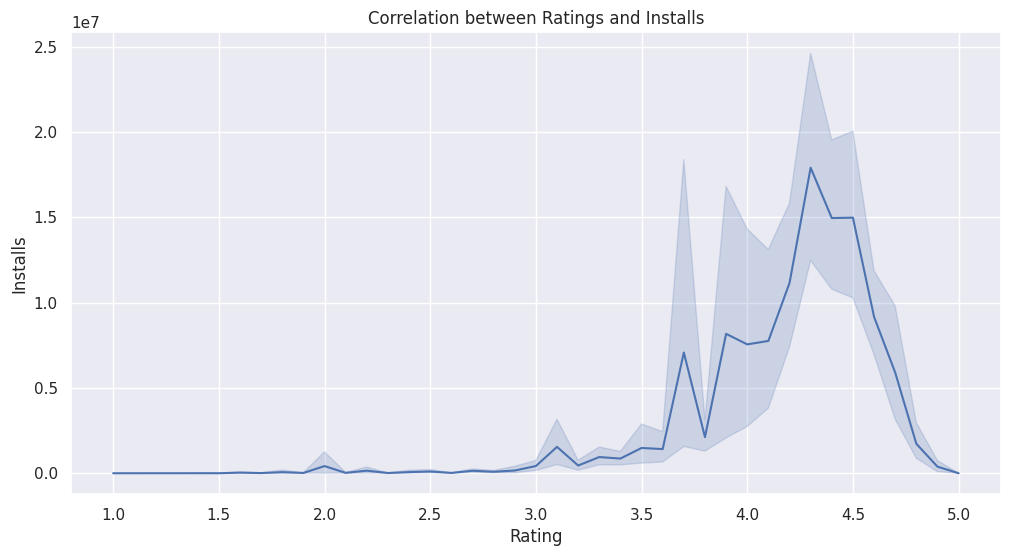

In [101]:
# Trying to find any correlation between Ratings and installs using lineplot.
plt.figure(figsize = (12,6))
sns.lineplot(data = df, x = 'Rating', y = 'Installs')
plt.title("Correlation between Ratings and Installs")
plt.show()

# Multivariate Analysis

# 20. Find out the average rating of each category in each type.(Identify the maximum as well as minimum rated category and it's type).

In [102]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Type_numeric', 'Last updated year', 'Rating_str'],
      dtype='object')

In [103]:
# Creating a data_frame in which the index will be Categories, columns will be Type and values will be Ratings
category_type_pivot = df.pivot_table(index = 'Category', columns = 'Type', values = 'Rating')

In [104]:
# Checking for null values.
category_type_pivot.isnull().sum()

Type
Free    0
Paid    5
dtype: int64

In [105]:
# Creating a column named Paid_mean which will hold values as column Paid and the null values will be filled by the mean value of the column Paid.
category_type_pivot['paid_mean'] = category_type_pivot['Paid'].fillna(category_type_pivot['Paid'].mean())

<Axes: xlabel='Paid', ylabel='Density'>

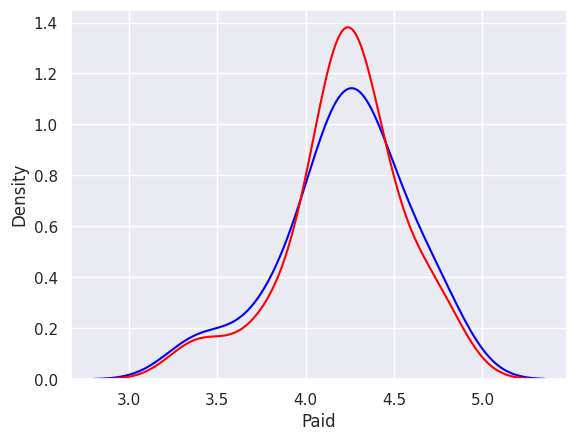

In [106]:
# Checking how different are these two column Paid and Paid_mean fromeach other by plotting kde plot.
sns.kdeplot(x = category_type_pivot['Paid'], color = 'blue')
sns.kdeplot(x = category_type_pivot['paid_mean'], color = 'red')

In [107]:
# Creating a column named Paid_median which will hold values as column Paid and the null values will be filled by the median value of the column Paid.
category_type_pivot['paid_median'] = category_type_pivot['Paid'].fillna(category_type_pivot['Paid'].median())

<Axes: xlabel='Paid', ylabel='Density'>

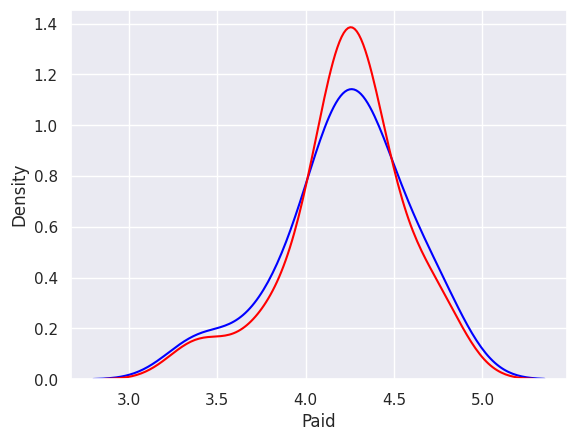

In [108]:
# Checking how different are these two column Paid and Paid_median from each other by plotting kde plot.
sns.kdeplot(x = category_type_pivot['Paid'], color = 'blue')
sns.kdeplot(x = category_type_pivot['paid_median'], color = 'red')

In [109]:
# Creating a column named Paid_median which will hold values as column Paid and the null values will be filled by the median value of the column Paid.
category_type_pivot['paid_mode'] = category_type_pivot['Paid'].fillna(category_type_pivot['Paid'].mode()[0])

<Axes: xlabel='Paid', ylabel='Density'>

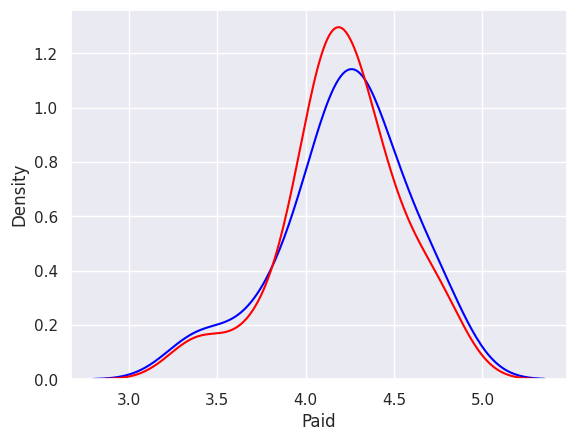

In [110]:
# Checking how different are these two column Paid and Paid_median from each other by plotting kde plot.
sns.kdeplot(x = category_type_pivot['Paid'], color = 'blue')
sns.kdeplot(x = category_type_pivot['paid_mode'], color = 'red')

In [111]:
# Deleting these three additional columns which were created for statistical analysis.
category_type_pivot.drop(columns = ['paid_mean','paid_median','paid_mode'], axis = 0, inplace = True)

In [112]:
# The column in which the null values were filled with the mode values were closest to the column Paid. Hence, filling the null values with the mode.
category_type_pivot.fillna(category_type_pivot['Paid'].mode()[0], inplace = True)

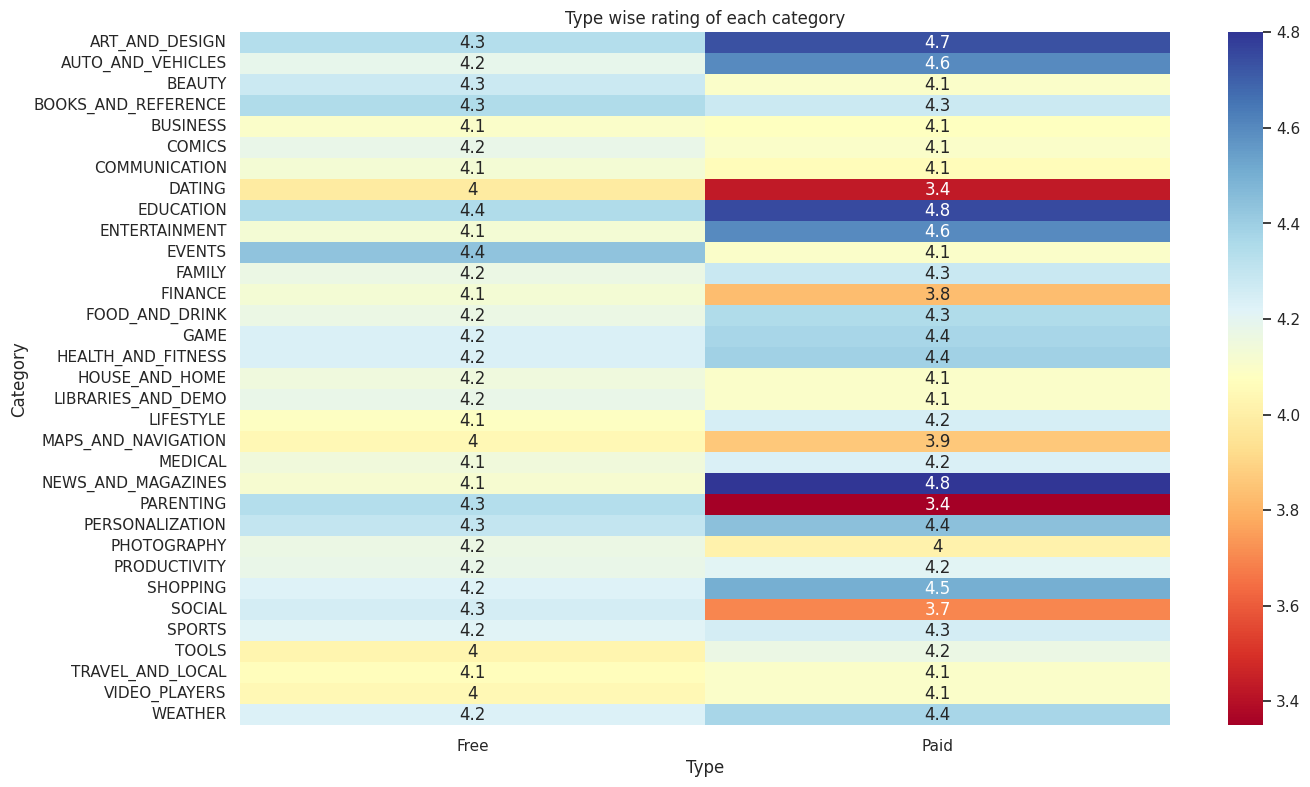

In [113]:
# Plotting Type wise Rating of each Category using heatmap.
plt.figure(figsize = (15,9))
sns.heatmap(category_type_pivot, annot = True, cmap="RdYlBu")
plt.title('Type wise rating of each category')
plt.show()

# Now that we have gathered some valueable information from the playstore_app dataset. Let's check the user_review dataset for further analysis.

In [114]:
# Checking the dataframe
user_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


# Exploring the data

In [115]:
# Checking the shape of the dataset.
user_review.shape

(64295, 5)

In [116]:
# An overview of the dataset user_review
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [117]:
# Checking the columns.
user_review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [118]:
# Checking how many unique Apps are there in the dataset.
user_review['App'].nunique()

1074

In [119]:
# Checking the frequency count of each unique value present in Sentiment column.
user_review['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [120]:
# Checking the frequency count of each unique value present in Sentiment_Polarity column.
user_review['Sentiment_Polarity'].value_counts()

 0.000000    5163
 0.500000    1524
 0.700000     991
 1.000000     959
 0.800000     639
             ... 
-0.072024       1
 0.452000       1
 0.076190       1
-0.067256       1
 0.173333       1
Name: Sentiment_Polarity, Length: 5410, dtype: int64

In [121]:
# Checking the frequency count of each unique value present in Sentiment_Subjectivity column.
user_review['Sentiment_Subjectivity'].value_counts()

0.000000    4416
1.000000    1749
0.500000    1647
0.600000    1166
0.750000    1140
            ... 
0.616909       1
0.234848       1
0.154762       1
0.591146       1
0.259470       1
Name: Sentiment_Subjectivity, Length: 4474, dtype: int64

In [122]:
user_review.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


# About the dataset

Based on our inspection, the "User_review" dataframe contains 64295 rows and 5 columns. Here is a breakdown of each column and the information it represents:

* **App** - This column contains the name of the application.

* **Translated_Review** - This column contain the explanation of the review that is given by the user.

* **Sentiment** - This column has three different values based on sentiment such as Positive, Negetive, Neutral.

* **Sentiment_Polarity** - This column refers to the measure of sentiment or emotion given by the users

*  Sentiment_Subjectivity - The subjectivity value, ranging from 0 to 1, indicates how closely a reviewer's opinion aligns with the general public's opinion. Higher subjectivity suggests alignment, while lower subjectivity suggests the review is more factual than opinionated.

# Data Cleaning

In [123]:
# Checking the null values.
user_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [124]:
user_review1=pd.DataFrame(index=user_review.columns)
user_review1['Datatype']=user_review.dtypes
user_review1['Notnull']=user_review.count()
user_review1['Null']=user_review.isnull().sum()
user_review1

,Datatype,Notnull,Null
App,object,64295,0
Translated_Review,object,37427,26868
Sentiment,object,37432,26863
Sentiment_Polarity,float64,37432,26863
Sentiment_Subjectivity,float64,37432,26863


In [125]:
# checking those rows which has null values.
user_review[user_review.isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,NaN,NaN,NaN,NaN,NaN
64291,NaN,NaN,NaN,NaN,NaN
64292,NaN,NaN,NaN,NaN,NaN
64293,NaN,NaN,NaN,NaN,NaN


In [126]:
# Dropping those rows which has null values.
user_review.dropna(inplace = True)

In [127]:
# Checking if the dataset still has null values.
user_review.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

# Data analysis on user_review

In [128]:
# Checking the cleaned dataset before starting exploratory data analysis.
user_review.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000
10,10 Best Foods for You,good you.,Positive,0.70,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.20,0.100000


# 21. Find out the percentage of review sentiment across the dataset.

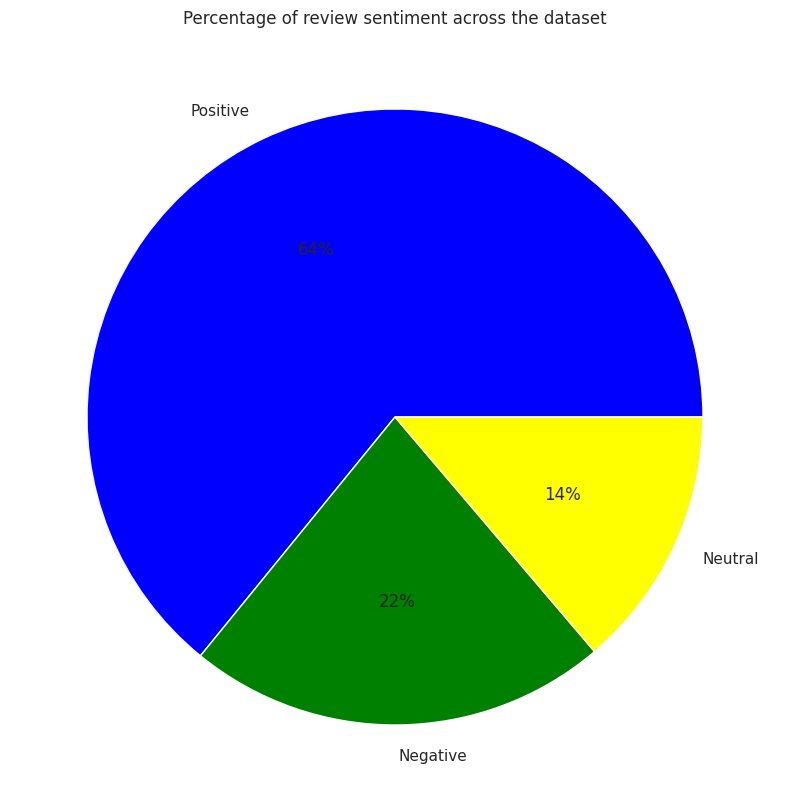

In [129]:
# Plotting the percentage of review sentiment across the dataset.
plt.figure(figsize = (15,10))
colors = ['blue', 'green', 'yellow']
plt.pie(x = user_review['Sentiment'].value_counts(), labels= user_review['Sentiment'].value_counts().index, colors=colors, autopct = '%2.f%%')
plt.title("Percentage of review sentiment across the dataset")
plt.show()

In [130]:
merged_df = pd.merge(df, user_review, on='App')
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type_numeric,Last updated year,Rating_str,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,2018,Above average,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,2018,Above average,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,2018,Above average,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,2018,Above average,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,2018,Above average,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35924,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,0,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,0,2018,Top rated,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
35925,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,0,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,0,2018,Top rated,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
35926,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,0,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,0,2018,Top rated,Too much ads,Positive,0.200000,0.200000
35927,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,0,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,0,2018,Top rated,Just allow time ...,Neutral,0.000000,0.000000


# 22. Check if there any correlation between Sentiment Polarity and Rating.

<Axes: xlabel='Rating', ylabel='Sentiment_Polarity'>

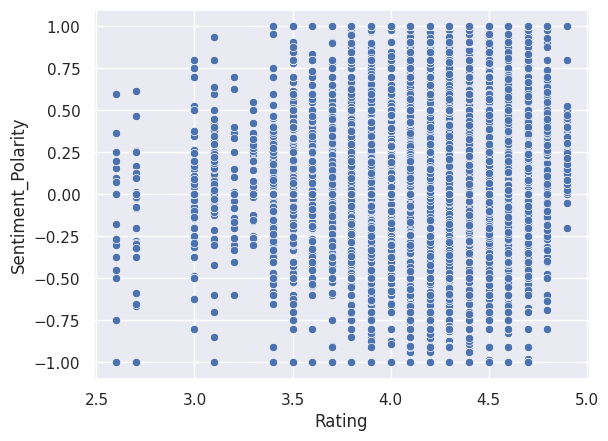

In [131]:
sns.scatterplot(x = merged_df['Rating'], y = merged_df['Sentiment_Polarity'])

# 23. Sentiment analysis based on category.

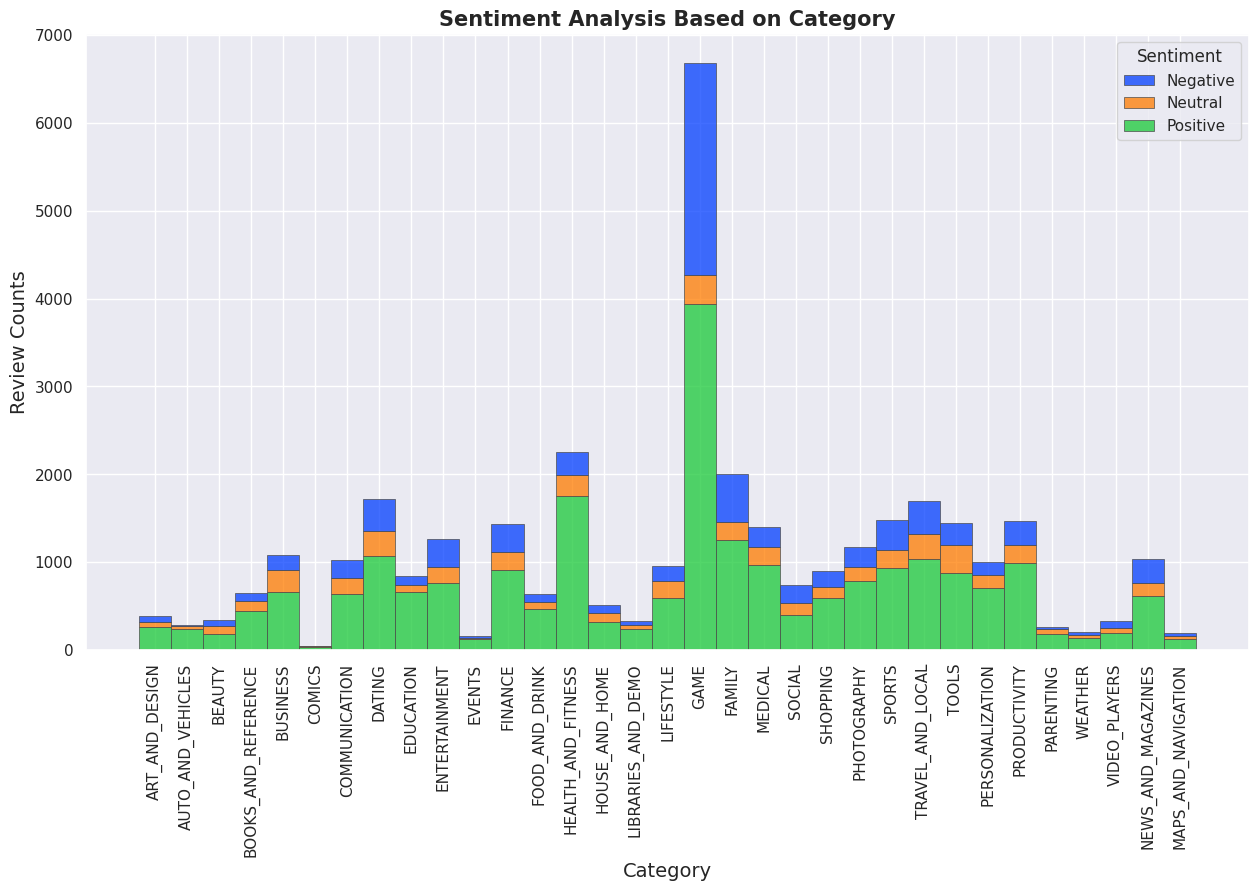

In [132]:
plt.figure(figsize=(15, 8))
sns.histplot(data=merged_df, x="Category", hue="Sentiment", multiple="stack", palette="bright", edgecolor=".3", linewidth=.5)

plt.title("Sentiment Analysis Based on Category", fontsize=15, fontweight='bold')
plt.xlabel("Category", fontsize=14)
plt.ylabel("Review Counts", fontsize=14)
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

# 24. Check the correlation among every feature.

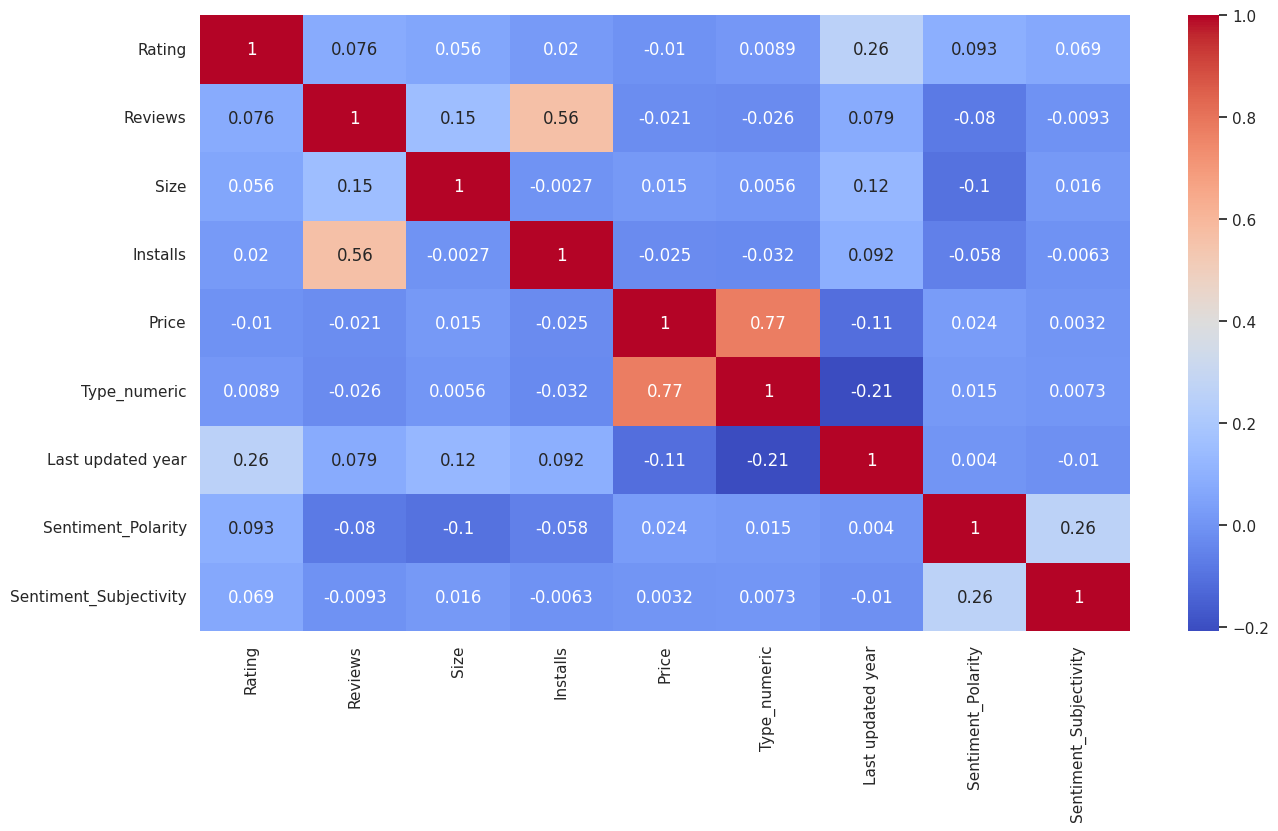

In [133]:
plt.figure(figsize=(15, 8))
sns.heatmap(merged_df.corr(), annot = True, cmap="coolwarm")
plt.show()